# Telecom Churn - Case Study

#### Goals
1. Retaining high profitable customers
2. Predict which customers are at high risk of churn
    - Predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months

Analysis done by
- Aditya Bhave
- Sivaprasad T R

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Scalers
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier

# Hyperparameter tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# RFE
from sklearn.feature_selection import RFE

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Set pandas options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None

# Load Data

In [2]:
# Read data

df = pd.read_csv("telecom_churn_data.csv")
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  \
0     7000842753        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  197.385  214.816  213.803   21.100          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            NaN            NaN           0.00            NaN            NaN            NaN           0.00            NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN           NaN           NaN          0.00           NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN   
1     7001865778        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014   34.047  355.074  268.321   86.285        24.11        78.68         7.68        18.34         15.74         99.84        304.76         53.76            0.0           0.00           0.00           0.00            0.0           0.00           0.00           0.00             23.88             74.56              7.68             18.34             11.51             75.94            291.86             53.76              0.00              0.00              0.00              0.00               0.0              2.91              0.00              0.00         35.39        150.51        299.54         72.11              0.23              4.11              0.00              0.00              0.00              0.46              0.13              0.00              0.00              0.00              0.00               0.0   
2     7001625959        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  167.690  189.058  210.226  290.714        11.54        55.24        37.26        74.81        143.33        220.59        208.36        118.91            0.0           0.00           0.00          38.49            0.0           0.00           0.00          70.94              7.19             28.74             13.58             14.39             29.34             16.86             38.46             28.16             24.11             21.79             15.61             22.24               0.0            135.54             45.76              0.48         60.66         67.41         67.66         64.81              4.34             26.49             22.58              8.76             41.81             67.41             75.53              9.28              1.48             14.76             22.83               0.0   
3     7001204172        109             0.0            

# Data Analysis and Preparation

In [3]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  \
count   9.999900e+04    99999.0         98981.0         98981.0         98981.0  99999.000000  99999.000000  99999.000000  99999.000000  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   94621.000000   92254.000000   96062.000000   96140.000000   94621.000000   92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.000000  96062.000000  96140.000000  94621.000000  92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.000000           96062.0           96140.0           94621.0   
mean    7.001207e+09      109.0             0.0             0.0             0.0    282.987358    278.536648    279.154731    261.645069    132.395875    133.670805    133.018098    130.302327    197.935577    197.045133    196.574803    190.337222       9.950013       7.149898       7.292981       6.343841      13.911337       9.818732       9.971890       8.555519         47.100763         46.473010         45.887806         44.584446         93.342088         91.397131         91.755128         90.463192          3.751013          3.792985          3.677991          3.655123          1.123056          1.368500          1.433821          1.232726    144.201175    141.670476    141.328209    138.709970         79.829870         83.299598         83.282673         82.342919         87.299624         90.804137         89.838390         86.276622          1.129011          1.115010          1.067792          1.042362               0.0               0.0               0.0   
std     6.956694e+05        0.0             0.0             0.0             0.0    328.439770    338.156291    344.474791    341.998630    297.207406    308.794148    308.951589    308.477668    316.851613    325.862803    327.170662    319.396092      72.825411      73.447948      68.402466      57.137537      71.443196      58.455762      64.713221      58.438186        150.856393        155.318705        151.184830        147.995390        162.780544        157.492308        156.537048        158.681454         14.230438         14.264986         13.270996         13.457549          5.448946          7.533445          6.783335          5.619021    251.751489    248.731086    245.914311    245.934517        252.476533        263.631042        265.486090        267.184991        255.617850        269.347911        271.757783        261.407396          7.984970          8.599406          7.905971          8.261770               0.0               0.0               0.0   
min     7.000000e+09      109.0             0.0             0.0    

In [4]:
df

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  \
0         7000842753        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  197.385  214.816  213.803   21.100          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            NaN            NaN           0.00            NaN            NaN            NaN           0.00            NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN           NaN           NaN          0.00           NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN   
1         7001865778        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014   34.047  355.074  268.321   86.285        24.11        78.68         7.68        18.34         15.74         99.84        304.76         53.76            0.0           0.00           0.00           0.00            0.0           0.00           0.00           0.00             23.88             74.56              7.68             18.34             11.51             75.94            291.86             53.76              0.00              0.00              0.00              0.00              0.00              2.91              0.00              0.00         35.39        150.51        299.54         72.11              0.23              4.11              0.00              0.00              0.00              0.46              0.13              0.00              0.00              0.00              0.00               0.0   
2         7001625959        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  167.690  189.058  210.226  290.714        11.54        55.24        37.26        74.81        143.33        220.59        208.36        118.91            0.0           0.00           0.00          38.49            0.0           0.00           0.00          70.94              7.19             28.74             13.58             14.39             29.34             16.86             38.46             28.16             24.11             21.79             15.61             22.24              0.00            135.54             45.76              0.48         60.66         67.41         67.66         64.81              4.34             26.49             22.58              8.76             41.81             67.41             75.53              9.28              1.48             14.76             22.83               0.0   
3         7001204172        109            

## Lets filter high value customers and derive churn
#### Advantages of filtering and deriving churn before data analysis
1. Since we are interested only in high value customers, we do not want to impute the values based on all customers
2. Since we can derive churn and remove columns corresponding to month 9, we will be dealing with only required columns

### Filter high value customers

In [5]:
# lets check nulls in total_rech_amt_6 and total_rech_amt_7

df.loc[:, ['total_rech_amt_6','total_rech_amt_7']].isna().sum()

total_rech_amt_6    0
total_rech_amt_7    0
dtype: int64

In [6]:
# Lets filter data based on requirement
# Those who have recharged with an amount more than or equal to X, 
# where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

df.loc[:, 'total_rech_amt_67'] = df[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)

In [7]:
df['total_rech_amt_67']

0        307.0
1        229.0
2        241.5
3        270.0
4        273.0
         ...  
99994     85.0
99995    110.0
99996     59.5
99997    369.5
99998    355.0
Name: total_rech_amt_67, Length: 99999, dtype: float64

In [8]:
df['total_rech_amt_67'].describe(percentiles=[0.7])

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
50%        229.000000
70%        368.500000
max      37762.500000
Name: total_rech_amt_67, dtype: float64

In [9]:
# Filter DataFrame

df = df[df['total_rech_amt_67'] >= df['total_rech_amt_67'].quantile(0.7)]

In [10]:
# lets check length of df

df.shape

(30011, 227)

### After filtering we have about 30k records

## Derive Churn
We can check if there are any nulls in the columns basaed on which we are going to derive Churn vs non Churn
The columns are - total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9

In [11]:
# checking nulls in required columns

df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isna().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [12]:
# checking minimum values

df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].min()

total_ic_mou_9    0.0
total_og_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

In [13]:
# as there are no nulls and minimum value is 0, we can tag the record as Churn = True/False based on the condition

churn = (df.loc[:, ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0)
df['churn'] = churn

In [14]:
# lets drop all columns which are corresponding to 9th month

columns_to_remove = list(df.columns[df.columns.str.find('_9') != -1])
columns_to_remove.append('sep_vbc_3g')
df = df.drop(columns_to_remove, axis = 1)

In [15]:
df

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  \
7         7000701601        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014  1069.180  1349.850  3171.480        57.84        54.68        52.29        453.43        567.16        325.91          16.23          33.49          31.64          23.74          12.59          38.06             51.39             31.38             40.28            308.63            447.38            162.28             62.13             55.14             53.23              0.00              0.00              0.00        422.16        533.91        255.79              4.30             23.29             12.01             49.89             31.76             49.14              6.66             20.08             16.68               0.0               0.0               0.0         60.86         75.14         77.84           0.0          0.18         10.01          4.50          0.00          6.50         0.00          0.0          0.0   
8         7001524846        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014   378.721   492.223   137.362       413.69       351.03        35.08         94.66         80.63        136.48           0.00           0.00           0.00           0.00           0.00           0.00            297.13            217.59             12.49             80.96             70.58             50.54              0.00              0.00              0.00              0.00              0.00              7.15        378.09        288.18         63.04            116.56            133.43             22.58             13.69             10.04             75.69              0.00              0.00              0.00               0.0               0.0               0.0        130.26        143.48         98.28           0.0          0.00          0.00          0.00          0.00         10.23         0.00          0.0          0.0   
13        7002191713        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014   492.846   205.671   593.260       501.76       108.39       534.24        413.31        119.28        482.46          23.53         144.24          72.11           7.98          35.26           1.44             49.63              6.19             36.01            151.13             47.28            294.46              4.54              0.00             23.51              0.00              0.00              0.49        205.31         53.48        353.99            446.41             85.98            498.23            255.36             52.94            156.94              0.00              0.00              0.00               0.0               0.0               0.0        701.78        138.93        655.18           0.0          0.00          1.29          0.00          0.00          4.78         0.00          0.0          0.0   
16        7000875565        109             0.0             0.0

In [16]:
# Date columns are not required. Lets drop all date columns
# Also, we can remove some columns which are not useful

columns_to_remove = ['mobile_number','circle_id',
                     'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                     'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
                     'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']
df = df.drop(columns_to_remove, axis=1)

In [17]:
df

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  \
7                 0.0             0.0             0.0  1069.180  1349.850  3171.480        57.84        54.68        52.29        453.43        567.16        325.91          16.23          33.49          31.64          23.74          12.59          38.06             51.39             31.38             40.28            308.63            447.38            162.28             62.13             55.14             53.23              0.00              0.00              0.00        422.16        533.91        255.79              4.30             23.29             12.01             49.89             31.76             49.14              6.66             20.08             16.68               0.0               0.0               0.0         60.86         75.14         77.84           0.0          0.18         10.01          4.50          0.00          6.50         0.00          0.0          0.0          487.53          609.24          350.16             58.14             32.26             27.31   
8                 0.0             0.0             0.0   378.721   492.223   137.362       413.69       351.03        35.08         94.66         80.63        136.48           0.00           0.00           0.00           0.00           0.00           0.00            297.13            217.59             12.49             80.96             70.58             50.54              0.00              0.00              0.00              0.00              0.00              7.15        378.09        288.18         63.04            116.56            133.43             22.58             13.69             10.04             75.69              0.00              0.00              0.00               0.0               0.0               0.0        130.26        143.48         98.28           0.0          0.00          0.00          0.00          0.00         10.23         0.00          0.0          0.0          508.36          431.66          171.56             23.84              9.84              0.31   
13                0.0             0.0             0.0   492.846   205.671   593.260       501.76       108.39       534.24        413.31        119.28        482.46          23.53         144.24          72.11           7.98          35.26           1.44             49.63              6.19             36.01            151.13             47.28            294.46              4.54              0.00             23.51              0.00              0.00              0.49        205.31         53.48        353.99            446.41             85.98            498.23            255.36             52.94            156.94              0.00              0.00              0.00               0.0               0.0               0.0        701.78        138.93        655.18           0.0          0.00          1.29          0.00          0.00          4.78         0.00          0.0          0.0          907.09          192.41         1015.26             67.88              7.58             52.58   
16         

## Missing value treatment

In [18]:
# check nulls

round(df.isna().sum()/len(df)*100, 2)

loc_og_t2o_mou         0.38
std_og_t2o_mou         0.38
loc_ic_t2o_mou         0.38
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
onnet_mou_6            1.05
onnet_mou_7            1.01
onnet_mou_8            3.13
offnet_mou_6           1.05
offnet_mou_7           1.01
offnet_mou_8           3.13
roam_ic_mou_6          1.05
roam_ic_mou_7          1.01
roam_ic_mou_8          3.13
roam_og_mou_6          1.05
roam_og_mou_7          1.01
roam_og_mou_8          3.13
loc_og_t2t_mou_6       1.05
loc_og_t2t_mou_7       1.01
loc_og_t2t_mou_8       3.13
loc_og_t2m_mou_6       1.05
loc_og_t2m_mou_7       1.01
loc_og_t2m_mou_8       3.13
loc_og_t2f_mou_6       1.05
loc_og_t2f_mou_7       1.01
loc_og_t2f_mou_8       3.13
loc_og_t2c_mou_6       1.05
loc_og_t2c_mou_7       1.01
loc_og_t2c_mou_8       3.13
loc_og_mou_6           1.05
loc_og_mou_7           1.01
loc_og_mou_8           3.13
std_og_t2t_mou_6       1.05
std_og_t2t_mou_7       1.01
std_og_t2t_mou_8    

In [19]:
df[df.churn].isna().sum()/len(df[df.churn]) * 100

loc_og_t2o_mou         1.966834
std_og_t2o_mou         1.966834
loc_ic_t2o_mou         1.966834
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
onnet_mou_6            4.087929
onnet_mou_7            6.131894
onnet_mou_8           28.384111
offnet_mou_6           4.087929
offnet_mou_7           6.131894
offnet_mou_8          28.384111
roam_ic_mou_6          4.087929
roam_ic_mou_7          6.131894
roam_ic_mou_8         28.384111
roam_og_mou_6          4.087929
roam_og_mou_7          6.131894
roam_og_mou_8         28.384111
loc_og_t2t_mou_6       4.087929
loc_og_t2t_mou_7       6.131894
loc_og_t2t_mou_8      28.384111
loc_og_t2m_mou_6       4.087929
loc_og_t2m_mou_7       6.131894
loc_og_t2m_mou_8      28.384111
loc_og_t2f_mou_6       4.087929
loc_og_t2f_mou_7       6.131894
loc_og_t2f_mou_8      28.384111
loc_og_t2c_mou_6       4.087929
loc_og_t2c_mou_7       6.131894
loc_og_t2c_mou_8      28.384111
loc_og_mou_6           4.087929
loc_og_m

In [20]:
# Lets check rows with maximum nulls

row_null_count = df.isna().sum(axis=1)
row_null_count.sort_values(ascending=False)

57525    117
30548    117
96449    117
32368    117
74778    117
        ... 
33967      0
33959      0
82735      0
33917      0
99997      0
Length: 30011, dtype: int64

In [21]:
# lets check such rows wih 117 missing values

df.loc[row_null_count[row_null_count==117].index]

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  \
3506              NaN             NaN             NaN   996.558     0.000     0.000          NaN          NaN          NaN           NaN           NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN          NaN          NaN          NaN             0.0             0.0             0.0               NaN               NaN               NaN   
4190              NaN             NaN             NaN  2502.516     0.000     0.000          NaN          NaN          NaN           NaN           NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN          NaN          NaN          NaN             0.0             0.0             0.0               NaN               NaN               NaN   
5539              NaN             NaN             NaN   249.000   243.106   374.000          NaN          NaN          NaN           NaN           NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN          NaN          NaN          NaN             0.0             0.0             0.0               NaN               NaN               NaN   
14191      

Looks like above rows have all columns null except for month 6. In our analysis we are considering that month 6 and 7 are good phase and 8 as action phase. Since these customers could not give us the insight based on our assumption. We should drop these rows where 117 columns have null values. These rows have around 70% values null

In [22]:
# dropping rows

df = df.drop(row_null_count[row_null_count==117].index)
df.shape

(29989, 162)

In [23]:
# check nulls

pd.DataFrame(round(df.isna().sum()/len(df)*100, 2)).sort_values(by=[0],ascending=False)

0
night_pck_user_6    62.00
max_rech_data_6     62.00
arpu_2g_6           62.00
fb_user_6           62.00
total_rech_data_6   62.00
arpu_3g_6           62.00
count_rech_2g_6     62.00
av_rech_amt_data_6  62.00
count_rech_3g_6     62.00
arpu_2g_7           61.11
arpu_3g_7           61.11
av_rech_amt_data_7  61.11
night_pck_user_7    61.11
count_rech_2g_7     61.11
max_rech_data_7     61.11
fb_user_7           61.11
total_rech_data_7   61.11
count_rech_3g_7     61.11
count_rech_3g_8     60.81
count_rech_2g_8     60.81
av_rech_amt_data_8  60.81
max_rech_data_8     60.81
arpu_3g_8           60.81
arpu_2g_8           60.81
total_rech_data_8   60.81
fb_user_8           60.81
night_pck_user_8    60.81
std_og_mou_8         3.05
std_ic_t2o_mou_8     3.05
spl_ic_mou_8         3.05
isd_og_mou_8         3.05
loc_og_t2t_mou_8     3.05
spl_og_mou_8         3.05
std_ic_mou_8         3.05
og_others_8          3.05
std_ic_t2f_mou_8     3.05
loc_og_t2m_mou_8     3.05
isd_ic_mou_8         3.05
loc_ic_t2t_mou_8     3.05
std_ic_t2m_mou_8     3.05
loc_ic_t2m_mou_8     3.05
std_ic_t2t_mou_8     3.05
loc_ic_t2f_mou_8     3.05
loc_ic_mou_8         3.05
loc_og_t2f_mou_8     3.05
std_og_t2c_mou_8     3.05
loc_og_t2c_mou_8     3.05
ic_others_8          3.05
std_og_t2f_mou_8     3.05
roam_og_mou_8        3.05
onnet_mou_8          3.05
std_og_t2m_mou_8     3.05
roam_ic_mou_8        3.05
loc_og_mou_8         3.05
std_og_t2t_mou_8     3.05
offnet_mou_8         3.05
std_ic_t2f_mou_6     0.98
std_ic_t2t_mou_6     0.98
onnet_mou_6          0.98
std_ic_t2m_mou_6     0.98
offnet_mou_6         0.98
roam_ic_mou_6        0.98
loc_og_t2m_mou_6     0.98
isd_ic_mou_6         0.98
std_ic_mou_6         0.98
roam_og_mou_6        0.98
loc_og_t2t_mou_6     0.98
spl_ic_mou_6         0.98
ic_others_6          0.98
loc_ic_mou_6         0.98
std_ic_t2o_mou_6     0.98
isd_og_mou_6         0.98
loc_ic_t2t_mou_6     0.98
std_og_t2c_mou_6     0.98
std_og_t2f_mou_6     0.98
spl_og_mou_6         0.98
og_others_6          0.98
std_og_t2m_mou_6     0.98
std_og_t2t_mou_6     0.98
loc_og_t2f_mou_6     0.98
loc_ic_t2m_mou_6     0.98
loc_og_mou_6         0.98
loc_ic_t2f_mou_6     0.98
loc_og_t2c_mou_6     0.98
std_og_mou_6         0.98
loc_og_mou_7         0.94
onnet_mou_7          0.94
offnet_mou_7         0.94
std_og_t2c_mou_7     0.94
std_og_t2t_mou_7     0.94
roam_ic_mou_7        0.94
std_og_t2m_mou_7     0.94
loc_og_t2c_mou_7     0.94
roam_og_mou_7        0.94
std_og_t2f_mou_7     0.94
ic_others_7          0.94
loc_ic_mou_7         0.94
isd_ic_mou_7         0.94
std_ic_t2o_mou_7     0.94
std_ic_t2t_mou_7     0.94
loc_ic_t2m_mou_7     0.94
std_ic_t2m_mou_7     0.94
loc_ic_t2t_mou_7     0.94
std_ic_t2f_mou_7     0.94
loc_og_t2m_mou_7     0.94
og_others_7          0.94
std_og_mou_7         0.94
std_ic_mou_7         0.94
spl_og_mou_7         0.94
loc_og_t2t_mou_7     0.94
isd_og_mou_7         0.94
spl_ic_mou_7         0.94
loc_ic_t2f_mou_7     0.94
loc_og_t2f_mou_7     0.94
loc_og_t2o_mou       0.31
std_og_t2o_mou       0.31
loc_ic_t2o_mou       0.31
last_day_rch_amt_8   0.00
monthly_3g_8         0.00
monthly_2g_6         0.00
monthly_2g_7         0.00
monthly_2g_8         0.00
sachet_2g_6          0.00
sachet_2g_7          0.00
sachet_2g_8          0.00
monthly_3g_6         0.00
monthly_3g_7         0.00
sachet_3g_6          0.00
total_og_mou_6       0.00
sachet_3g_7          0.00
sachet_3g_8          0.00
arpu_7               0.00
arpu_6               0.00
aon                  0.00
aug_vbc_3g           0.00
jul_vbc_3g           0.00
jun_vbc_3g           0.00
total_rech_amt_67    0.00
arpu_8               0.00
total_og_mou_7       0.00
last_day_rch_amt_7   0.00
total_og_mou_8       0.00
last_day_rch_amt_6   0.00
max_rech_amt_8       0.00
max_rech_amt_7       0.00
max_rech_amt_6       0.00
total_rech_amt_8     0.00
total_rech_amt_7     0.00
total_rech_amt_6     0.00
total_rech_num_8     0.00
total_rech_num_7     0.00
vol_2g_mb_6          0.00
vol_2g_mb_7          0.00
vol_2g_mb_8         

In [24]:
# check columns where are more than 50%. We can remove these columns 

columns_to_remove = df.loc[:, round(df.isna().sum()/len(df)*100, 2) > 50].columns
columns_to_remove

# dropping columns with more than 50% nulls

df = df.drop(columns_to_remove, axis=1)

In [25]:
# check nulls

pd.DataFrame(round(df.isna().sum()/len(df)*100, 2)).sort_values(by=[0],ascending=False)

0
std_ic_mou_8        3.05
loc_og_t2t_mou_8    3.05
loc_og_t2f_mou_8    3.05
std_ic_t2m_mou_8    3.05
loc_og_t2c_mou_8    3.05
loc_ic_t2m_mou_8    3.05
std_og_t2t_mou_8    3.05
std_ic_t2t_mou_8    3.05
std_og_t2m_mou_8    3.05
std_og_t2f_mou_8    3.05
std_og_t2c_mou_8    3.05
std_og_mou_8        3.05
loc_ic_mou_8        3.05
isd_og_mou_8        3.05
spl_og_mou_8        3.05
og_others_8         3.05
loc_ic_t2f_mou_8    3.05
spl_ic_mou_8        3.05
loc_ic_t2t_mou_8    3.05
loc_og_t2m_mou_8    3.05
loc_og_mou_8        3.05
roam_ic_mou_8       3.05
std_ic_t2f_mou_8    3.05
offnet_mou_8        3.05
ic_others_8         3.05
roam_og_mou_8       3.05
isd_ic_mou_8        3.05
onnet_mou_8         3.05
std_ic_t2o_mou_8    3.05
loc_og_t2m_mou_6    0.98
std_ic_t2t_mou_6    0.98
offnet_mou_6        0.98
isd_og_mou_6        0.98
std_ic_mou_6        0.98
og_others_6         0.98
spl_og_mou_6        0.98
onnet_mou_6         0.98
loc_ic_mou_6        0.98
ic_others_6         0.98
isd_ic_mou_6        0.98
loc_ic_t2t_mou_6    0.98
loc_ic_t2m_mou_6    0.98
std_og_mou_6        0.98
spl_ic_mou_6        0.98
roam_og_mou_6       0.98
std_og_t2t_mou_6    0.98
loc_og_t2f_mou_6    0.98
std_ic_t2f_mou_6    0.98
loc_og_t2t_mou_6    0.98
loc_og_t2c_mou_6    0.98
std_ic_t2o_mou_6    0.98
loc_og_mou_6        0.98
std_og_t2c_mou_6    0.98
loc_ic_t2f_mou_6    0.98
std_ic_t2m_mou_6    0.98
std_og_t2m_mou_6    0.98
roam_ic_mou_6       0.98
std_og_t2f_mou_6    0.98
loc_ic_mou_7        0.94
std_ic_t2m_mou_7    0.94
std_ic_t2o_mou_7    0.94
std_ic_mou_7        0.94
spl_ic_mou_7        0.94
std_ic_t2t_mou_7    0.94
std_ic_t2f_mou_7    0.94
loc_ic_t2f_mou_7    0.94
loc_ic_t2m_mou_7    0.94
loc_og_t2c_mou_7    0.94
ic_others_7         0.94
onnet_mou_7         0.94
offnet_mou_7        0.94
roam_ic_mou_7       0.94
roam_og_mou_7       0.94
loc_og_t2t_mou_7    0.94
loc_og_t2m_mou_7    0.94
loc_og_t2f_mou_7    0.94
loc_og_mou_7        0.94
loc_ic_t2t_mou_7    0.94
std_og_t2t_mou_7    0.94
std_og_t2m_mou_7    0.94
std_og_t2f_mou_7    0.94
std_og_mou_7        0.94
isd_og_mou_7        0.94
spl_og_mou_7        0.94
og_others_7         0.94
isd_ic_mou_7        0.94
std_og_t2c_mou_7    0.94
loc_og_t2o_mou      0.31
std_og_t2o_mou      0.31
loc_ic_t2o_mou      0.31
total_ic_mou_7      0.00
monthly_3g_7        0.00
vol_3g_mb_7         0.00
vol_3g_mb_8         0.00
monthly_2g_6        0.00
monthly_2g_7        0.00
monthly_2g_8        0.00
sachet_2g_6         0.00
sachet_2g_7         0.00
sachet_2g_8         0.00
monthly_3g_6        0.00
monthly_3g_8        0.00
vol_2g_mb_8         0.00
sachet_3g_6         0.00
sachet_3g_7         0.00
sachet_3g_8         0.00
aon                 0.00
aug_vbc_3g          0.00
jul_vbc_3g          0.00
jun_vbc_3g          0.00
total_rech_amt_67   0.00
vol_3g_mb_6         0.00
vol_2g_mb_6         0.00
vol_2g_mb_7         0.00
total_ic_mou_8      0.00
total_ic_mou_6      0.00
total_og_mou_8      0.00
total_og_mou_7      0.00
total_og_mou_6      0.00
arpu_8              0.00
arpu_7              0.00
arpu_6              0.00
total_rech_num_6    0.00
total_rech_num_7    0.00
total_rech_num_8    0.00
total_rech_amt_6    0.00
total_rech_amt_7    0.00
total_rech_amt_8    0.00
max_rech_amt_6      0.00
max_rech_amt_7      0.00
max_rech_amt_8      0.00
last_day_rch_amt_6  0.00
last_day_rch_amt_7  0.00
last_day_rch_amt_8  0.00
churn               0.00

In [26]:
# lets check the nulls in 6th and 7th month (good phase)

df[df.std_ic_mou_6.isna() & df.std_ic_mou_7.isna()]

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  \
1489              0.0             0.0             0.0   600.339    76.826   986.809          NaN          NaN         0.00           NaN           NaN          6.96            NaN            NaN           0.00            NaN            NaN           0.00               NaN               NaN              0.00               NaN               NaN              0.00               NaN               NaN              0.00               NaN               NaN              6.96           NaN           NaN          0.00               NaN               NaN              0.00               NaN               NaN              0.00               NaN               NaN               0.0               NaN               NaN               0.0           NaN           NaN          0.00           NaN           NaN           0.0           NaN           NaN          6.96          NaN          NaN          0.0             0.0             0.0            6.96               NaN               NaN              0.00   
2185              NaN             NaN             NaN   386.514   386.506   386.491          NaN          NaN          NaN           NaN           NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN          NaN          NaN          NaN             0.0             0.0            0.00               NaN               NaN               NaN   
5220              NaN             NaN             NaN   427.619   213.786   213.799          NaN          NaN          NaN           NaN           NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN          NaN          NaN          NaN             0.0             0.0            0.00               NaN               NaN               NaN   
8265       

In [27]:
len(df[df.std_ic_mou_6.isna() & df.std_ic_mou_7.isna()])/len(df)

0.00393477608456434

We dont have any information from good phase and also the percentage is very small, we can drop these records

In [28]:
df = df.drop(df[df.std_ic_mou_6.isna() & df.std_ic_mou_7.isna()].index, axis=0)

In [29]:
# lets check the nulls in 6th and 7th month (good phase)

df[df.std_ic_mou_6.isna() & ~df.std_ic_mou_7.isna() & ~df.std_ic_mou_8.isna()]

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  \
77                0.0             0.0             0.0    30.000    82.378   674.950          NaN        34.23       149.69           NaN         39.44        179.18            NaN           0.00           0.00            NaN           0.00           0.00               NaN             34.23            149.69               NaN             32.18            101.63               NaN              0.91             29.86               NaN              0.00              3.90           NaN         67.33        281.19               NaN              0.00              0.00               NaN              0.00              0.00               NaN              6.35             40.09               NaN               0.0               0.0           NaN          6.35         40.09           NaN          2.93         28.04           NaN          0.00          7.58          NaN          0.0         0.00             0.0           76.61          356.93               NaN             79.46            191.24   
364               0.0             0.0             0.0     0.000   792.112   989.368          NaN       433.49       198.96           NaN        845.11        923.58            NaN           0.00           0.00            NaN           0.00           0.00               NaN             28.78              7.46               NaN             78.78            584.76               NaN             21.58              9.43               NaN              0.00              0.00           NaN        129.14        601.66               NaN            404.71            191.49               NaN            722.01            321.41               NaN              0.00              0.00               NaN               0.0               0.0           NaN       1126.73        512.91           NaN          0.00          0.00           NaN         45.14         13.84          NaN          0.0         0.00             0.0         1301.03         1128.43               NaN              7.41             10.23   
423               0.0             0.0             0.0   213.802   304.194   149.710          NaN         0.00         0.00           NaN         10.03          1.45            NaN           0.00           0.00            NaN           0.00           0.00               NaN              0.00              0.00               NaN              0.00              0.58               NaN              0.00              0.00               NaN              0.00              0.00           NaN          0.00          0.58               NaN              0.00              0.00               NaN              0.00              0.25               NaN              0.00              0.61               NaN               0.0               0.0           NaN          0.00          0.86           NaN         10.03          0.00           NaN          0.00          0.00          NaN          0.0         0.00             0.0           10.03            1.45               NaN              0.00              0.00   
934        

In [30]:
# lets capture all column prefixes so that we can automate value imputations

column_prefixes = df.loc[:, df.columns.str.endswith("_6") | df.columns.str.endswith("_7")].columns.str[:-2]
column_prefixes = set(column_prefixes)
column_prefixes

{'arpu',
 'ic_others',
 'isd_ic_mou',
 'isd_og_mou',
 'last_day_rch_amt',
 'loc_ic_mou',
 'loc_ic_t2f_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2t_mou',
 'loc_og_mou',
 'loc_og_t2c_mou',
 'loc_og_t2f_mou',
 'loc_og_t2m_mou',
 'loc_og_t2t_mou',
 'max_rech_amt',
 'monthly_2g',
 'monthly_3g',
 'offnet_mou',
 'og_others',
 'onnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'sachet_2g',
 'sachet_3g',
 'spl_ic_mou',
 'spl_og_mou',
 'std_ic_mou',
 'std_ic_t2f_mou',
 'std_ic_t2m_mou',
 'std_ic_t2o_mou',
 'std_ic_t2t_mou',
 'std_og_mou',
 'std_og_t2c_mou',
 'std_og_t2f_mou',
 'std_og_t2m_mou',
 'std_og_t2t_mou',
 'total_ic_mou',
 'total_og_mou',
 'total_rech_amt',
 'total_rech_num',
 'vol_2g_mb',
 'vol_3g_mb'}

In [31]:
# lets impute columns 6 and 7. If value in 6 is null then take the value from 7
# The reason for this is - We know that month 6 and month 7 is good phase. So if value is missing from this month,
# it is more likely that the value should be close to or equal to month 7's value

for col in column_prefixes:
    df[col+'_6'] = df[col+'_6'].fillna(df[col+'_7'])

In [32]:
# We will do same for 7th month missing value. i.e. replace missing value with 6 month's value

for col in column_prefixes:
    df[col+'_7'] = df[col+'_7'].fillna(df[col+'_6'])

In [33]:
# for month 8, wherever null we can fill with average of month 6 and 7

for col in column_prefixes:
    df[col+'_8'] = df[col+'_8'].fillna((df[col+'_6'] + df[col+'_7']).mean())

In [34]:
# check nulls

pd.DataFrame(round(df.isna().sum()/len(df)*100, 2)).sort_values(by=[0],ascending=False)

0
loc_og_t2o_mou      0.0
std_ic_mou_7        0.0
total_rech_num_6    0.0
ic_others_8         0.0
ic_others_7         0.0
ic_others_6         0.0
isd_ic_mou_8        0.0
isd_ic_mou_7        0.0
isd_ic_mou_6        0.0
spl_ic_mou_8        0.0
spl_ic_mou_7        0.0
spl_ic_mou_6        0.0
total_ic_mou_8      0.0
total_ic_mou_7      0.0
total_ic_mou_6      0.0
std_ic_mou_8        0.0
std_ic_mou_6        0.0
total_rech_num_8    0.0
std_ic_t2o_mou_8    0.0
std_ic_t2o_mou_7    0.0
std_ic_t2o_mou_6    0.0
std_ic_t2f_mou_8    0.0
std_ic_t2f_mou_7    0.0
std_ic_t2f_mou_6    0.0
std_ic_t2m_mou_8    0.0
std_ic_t2m_mou_7    0.0
std_ic_t2m_mou_6    0.0
std_ic_t2t_mou_8    0.0
std_ic_t2t_mou_7    0.0
std_ic_t2t_mou_6    0.0
loc_ic_mou_8        0.0
loc_ic_mou_7        0.0
total_rech_num_7    0.0
total_rech_amt_6    0.0
loc_ic_t2f_mou_8    0.0
monthly_2g_8        0.0
total_rech_amt_67   0.0
jun_vbc_3g          0.0
jul_vbc_3g          0.0
aug_vbc_3g          0.0
aon                 0.0
sachet_3g_8         0.0
sachet_3g_7         0.0
sachet_3g_6         0.0
monthly_3g_8        0.0
monthly_3g_7        0.0
monthly_3g_6        0.0
sachet_2g_8         0.0
sachet_2g_7         0.0
sachet_2g_6         0.0
monthly_2g_7        0.0
total_rech_amt_7    0.0
monthly_2g_6        0.0
vol_3g_mb_8         0.0
vol_3g_mb_7         0.0
vol_3g_mb_6         0.0
vol_2g_mb_8         0.0
vol_2g_mb_7         0.0
vol_2g_mb_6         0.0
last_day_rch_amt_8  0.0
last_day_rch_amt_7  0.0
last_day_rch_amt_6  0.0
max_rech_amt_8      0.0
max_rech_amt_7      0.0
max_rech_amt_6      0.0
total_rech_amt_8    0.0
loc_ic_mou_6        0.0
loc_ic_t2f_mou_7    0.0
std_og_t2o_mou      0.0
roam_og_mou_8       0.0
loc_og_mou_7        0.0
loc_og_mou_6        0.0
loc_og_t2c_mou_8    0.0
loc_og_t2c_mou_7    0.0
loc_og_t2c_mou_6    0.0
loc_og_t2f_mou_8    0.0
loc_og_t2f_mou_7    0.0
loc_og_t2f_mou_6    0.0
loc_og_t2m_mou_8    0.0
loc_og_t2m_mou_7    0.0
loc_og_t2m_mou_6    0.0
loc_og_t2t_mou_8    0.0
loc_og_t2t_mou_7    0.0
loc_og_t2t_mou_6    0.0
roam_og_mou_7       0.0
std_og_t2t_mou_6    0.0
roam_og_mou_6       0.0
roam_ic_mou_8       0.0
roam_ic_mou_7       0.0
roam_ic_mou_6       0.0
offnet_mou_8        0.0
offnet_mou_7        0.0
offnet_mou_6        0.0
onnet_mou_8         0.0
onnet_mou_7         0.0
onnet_mou_6         0.0
arpu_8              0.0
arpu_7              0.0
arpu_6              0.0
loc_ic_t2o_mou      0.0
loc_og_mou_8        0.0
std_og_t2t_mou_7    0.0
loc_ic_t2f_mou_6    0.0
spl_og_mou_6        0.0
loc_ic_t2m_mou_8    0.0
loc_ic_t2m_mou_7    0.0
loc_ic_t2m_mou_6    0.0
loc_ic_t2t_mou_8    0.0
loc_ic_t2t_mou_7    0.0
loc_ic_t2t_mou_6    0.0
total_og_mou_8      0.0
total_og_mou_7      0.0
total_og_mou_6      0.0
og_others_8         0.0
og_others_7         0.0
og_others_6         0.0
spl_og_mou_8        0.0
spl_og_mou_7        0.0
isd_og_mou_8        0.0
std_og_t2t_mou_8    0.0
isd_og_mou_7        0.0
isd_og_mou_6        0.0
std_og_mou_8        0.0
std_og_mou_7        0.0
std_og_mou_6        0.0
std_og_t2c_mou_8    0.0
std_og_t2c_mou_7    0.0
std_og_t2c_mou_6    0.0
std_og_t2f_mou_8    0.0
std_og_t2f_mou_7    0.0
std_og_t2f_mou_6    0.0
std_og_t2m_mou_8    0.0
std_og_t2m_mou_7    0.0
std_og_t2m_mou_6    0.0
churn               0.0

In [35]:
# Lets see counts of Churns

df.churn.value_counts()

False    27329
True      2542
Name: churn, dtype: int64

In [36]:
# Percentage of churners

len(df[df.churn])/len(df) * 100

8.509926015198687

In [37]:
# lets find outliers

df.describe(percentiles=[.05,.1,.25,.5,.75,.9,.95,.99])

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8   og_others_6   og_others_7   og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  \
count         29871.0         29871.0         29871.0  29871.000000  29871.000000  29871.000000  29871.000000  29871.000000  29871.000000  29871.000000  29871.000000  29871.000000   29871.000000   29871.000000   29871.000000   29871.000000   29871.000000   29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000  29871.000000  29871.000000  29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000           29871.0           29871.0           29871.0  29871.000000  29871.000000  29871.000000  29871.000000  29871.000000  29871.000000  29871.000000  29871.000000  29871.000000  29871.000000  29871.000000  29871.000000    29871.000000    29871.000000    29871.000000      29871.000000      29871.000000   
mean              0.0             0.0             0.0    587.213918    589.765224    535.794808    299.967695    307.536977    285.445744    422.572109    428.946185    400.016103      17.647220      13.758726      14.175440      29.718432      22.467303      22.995423         95.326695         96.638765         92.788711        182.668063        182.959459        178.353072          7.053293          7.160655          6.912814          1.587823          1.880046          1.814451    285.056940    286.767931    278.063555        192.893129        202.018931        183.790811        205.905589        216.223080        191.930751          2.034518          2.052258          1.909757               0.0               0.0               0.0    400.837610    420.298635    377.635476      2.342554      2.364443      2.167408      5.987259      7.503826      7.284346      0.695753      0.053234      0.079869      689.915969      712.448270      626.669220         69.205674         71.095946   
std               0.0             0.0             0.0    442.536724    463.245320    492.668483    466.234748    484.089337    468.238325    471.969342    488.272554    479.739026      79.577789      76.917149      74.743503     119.180713      98.918378     106.534286        237.288569        249.298075        235.325562        250.413130        241.765428        235.535672         22.782575         22.654695         20.269937          6.919572          9.284404          7.413178    380.217564    377.075325    367.631953        416.362173        430.667235        411.324309        416.401965        440.859839        418.235477         12.509082         13.386304         11.728924               0.0               0.0               0.0    612.492048    641.041329    618.792452     46.152079     46.458821     44.900281     18.692362     23.171914     22.936653      2.286172      2.757174      3.329964      660.223043      684.948388      686.272782        158.922658        169.855242   
min        

### Check column types

In [38]:
df.dtypes

loc_og_t2o_mou        float64
std_og_t2o_mou        float64
loc_ic_t2o_mou        float64
arpu_6                float64
arpu_7                float64
arpu_8                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8      float64
loc_og_t2f_mou_6      float64
loc_og_t2f_mou_7      float64
loc_og_t2f_mou_8      float64
loc_og_t2c_mou_6      float64
loc_og_t2c_mou_7      float64
loc_og_t2c_mou_8      float64
loc_og_mou_6          float64
loc_og_mou_7          float64
loc_og_mou_8          float64
std_og_t2t

In [39]:
# Following columns could be categorical

cat_columns = ['total_rech_num_6','total_rech_num_7','total_rech_num_8',
               'monthly_2g_6','monthly_2g_7','monthly_2g_8',
               'sachet_2g_6','sachet_2g_7','sachet_2g_8',
               'monthly_3g_6','monthly_3g_7','monthly_3g_8',
               'sachet_3g_6','sachet_3g_7','sachet_3g_8',
               ]

df[cat_columns].nunique()

total_rech_num_6    102
total_rech_num_7    101
total_rech_num_8     96
monthly_2g_6          5
monthly_2g_7          6
monthly_2g_8          6
sachet_2g_6          30
sachet_2g_7          34
sachet_2g_8          34
monthly_3g_6         12
monthly_3g_7         15
monthly_3g_8         12
sachet_3g_6          25
sachet_3g_7          26
sachet_3g_8          29
dtype: int64

### Above columns are ordered categorical. So we can leave them as is


In [40]:
# find highly skewed columns

def getHighSkewedColumns(df):     
    output = []
    threshold = .85 * (len(df))
    for col in df.columns:
        if(df[col].value_counts().max() >= threshold):
            output.append((col, round(df[col].value_counts().max()/len(df)*100),2))
    
    return output  

skewed_col = getHighSkewedColumns(df)
skewed_col

[('loc_og_t2o_mou', 100, 2),
 ('std_og_t2o_mou', 100, 2),
 ('loc_ic_t2o_mou', 100, 2),
 ('std_og_t2c_mou_6', 100, 2),
 ('std_og_t2c_mou_7', 100, 2),
 ('std_og_t2c_mou_8', 100, 2),
 ('isd_og_mou_6', 91, 2),
 ('isd_og_mou_7', 91, 2),
 ('isd_og_mou_8', 90, 2),
 ('og_others_7', 99, 2),
 ('og_others_8', 97, 2),
 ('std_ic_t2o_mou_6', 100, 2),
 ('std_ic_t2o_mou_7', 100, 2),
 ('std_ic_t2o_mou_8', 100, 2),
 ('spl_ic_mou_7', 94, 2),
 ('spl_ic_mou_8', 89, 2),
 ('monthly_2g_6', 89, 2),
 ('monthly_2g_7', 88, 2),
 ('monthly_2g_8', 90, 2),
 ('monthly_3g_6', 88, 2),
 ('monthly_3g_7', 88, 2),
 ('monthly_3g_8', 89, 2),
 ('sachet_3g_6', 93, 2),
 ('sachet_3g_7', 93, 2),
 ('sachet_3g_8', 94, 2),
 ('churn', 91, 2)]

In [41]:
skewed_col_names = [c[0] for c in skewed_col]

# since for some columns we are removing 7 and 8 month's columns, so we can remove 6th months columns as well
skewed_col_names.extend(['spl_ic_mou_6', 'og_others_6'])

skewed_col_names.remove('churn') # remove churn column from this list as we do not want to drop it

In [42]:
# drop skewed columns

df = df.drop(skewed_col_names, axis=1)

In [43]:
# lets find outliers

df.describe(percentiles=[.05,.1,.25,.5,.75,.9,.95,.99])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  \
count  29871.000000  29871.000000  29871.000000  29871.000000  29871.000000  29871.000000  29871.000000  29871.000000  29871.000000   29871.000000   29871.000000   29871.000000   29871.000000   29871.000000   29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000  29871.000000  29871.000000  29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000  29871.000000  29871.000000  29871.000000  29871.000000  29871.000000  29871.000000    29871.000000    29871.000000    29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000  29871.000000  29871.000000  29871.000000      29871.000000   
mean     587.213918    589.765224    535.794808    299.967695    307.536977    285.445744    422.572109    428.946185    400.016103      17.647220      13.758726      14.175440      29.718432      22.467303      22.995423         95.326695         96.638765         92.788711        182.668063        182.959459        178.353072          7.053293          7.160655          6.912814          1.587823          1.880046          1.814451    285.056940    286.767931    278.063555        192.893129        202.018931        183.790811        205.905589        216.223080        191.930751          2.034518          2.052258          1.909757    400.837610    420.298635    377.635476      5.987259      7.503826      7.284346      689.915969      712.448270      626.669220         69.205674         71.095946         70.078197        160.745004        162.239511        163.160360         15.713105         16.630091         15.658779    245.673717    249.975631    248.907507         16.426742   
std      442.536724    463.245320    492.668483    466.234748    484.089337    468.238325    471.969342    488.272554    479.739026      79.577789      76.917149      74.743503     119.180713      98.918378     106.534286        237.288569        249.298075        235.325562        250.413130        241.765428        235.535672         22.782575         22.654695         20.269937          6.919572          9.284404          7.413178    380.217564    377.075325    367.631953        416.362173        430.667235        411.324309        416.401965        440.859839        418.235477         12.509082         13.386304         11.728924    612.492048    641.041329    618.792452     18.692362     23.171914     22.936653      660.223043      684.948388      686.272782        158.922658        169.855242        156.050246        222.126971        220.796612        217.394025         45.971080         49.618867         43.824070    312.870658    318.362327    307.598907         79.133526   
min    -2258.7090

In [44]:
# we see too many outliers
# lets cap at 95% tile for upper and 1% tile for lower

df = df.apply(lambda x: x.clip(upper=np.percentile(x, 95), lower=np.percentile(x, 1)))

In [45]:
df.describe(percentiles=[.05,.1,.25,.5,.75,.9,.95,.99])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  \
count  29871.000000  29871.000000  29871.000000  29871.000000  29871.000000  29871.000000  29871.000000  29871.000000  29871.000000   29871.000000   29871.000000   29871.000000   29871.000000   29871.000000   29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000  29871.000000  29871.000000  29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000  29871.000000  29871.000000  29871.000000  29871.000000   29871.00000  29871.000000    29871.000000    29871.000000    29871.000000      29871.000000      29871.000000       29871.00000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000      29871.000000  29871.000000  29871.000000  29871.000000      29871.000000   
mean     560.043548    562.719500    507.497180    266.728630    273.524481    249.973499    389.172531    394.132987    365.541849       9.183752       5.729162       6.519938      17.037713      11.351202      11.947947         71.396489         71.781668         70.523286        164.703878        166.121580        161.709961          5.022181          5.137189          4.991917          0.964996          1.131481          1.130579    257.256831    259.093449    251.802103        163.058348        171.389013        151.528762        173.063099        181.723327        158.154626          0.715058          0.691309          0.705623    362.979465    380.468196    336.694772      4.370842       5.57789      5.430641      650.120938      669.442417      583.937023         55.075770         55.630398          55.80330        143.608835        145.216889        147.158046         11.417849         11.981792         11.545596    222.548319    226.156795    226.669959          9.818230   
std      281.413028    283.446989    318.109234    324.175288    337.033674    310.306650    338.069945    344.846013    329.593966      24.250456      16.117811      16.309717      43.777896      30.858337      29.760852         93.084138         92.698574         88.949027        172.228599        170.299041        167.075392          9.163596          9.295563          8.573466          2.333157          2.669009          2.509085    259.831833    256.019051    252.243841        282.485606        295.124317        263.690206        270.978128        285.385328        248.181329          2.067685          1.999507          1.856455    468.595450    487.769333    450.355942      7.511834       8.99921      8.473144      513.441005      524.825280      517.566379         65.654964         64.836231          64.22161        143.134887        141.143377        143.419001         19.580708         20.412243         18.487329    213.218695    212.427468    213.625477         17.559889   
min       19.3534

In [46]:
# To capture the change in action month, we will take average of the values for month 6 and 7
# Then we take difference between average(6,7 month) and 8 month's value
# e.g. if mean recharge value in month 6 and 7 was 100 and in month 8 it reduced to 40
# then we get the value as -60 which will indicate that there was a drop in recharge 
# post this we can keep the new value and drop 6, 7 month's columns

def calculate_diff(col, dframe):
    diff = dframe[col + '_8'] - dframe[[col + '_6',col + '_7']].mean(axis=1)
    return diff

def delete_cols(col, dframe):
    return dframe.drop([col+'_6', col+'_7'], axis=1)

# lets rename some columns to make them work with above functions
df = df.rename(columns={"jun_vbc_3g": "vbc_3g_6", "jul_vbc_3g": "vbc_3g_7", "aug_vbc_3g": "vbc_3g_8"})

column_prefixes = df.loc[:, df.columns.str.endswith("_6") | df.columns.str.endswith("_7")].columns.str[:-2]
column_prefixes = set(column_prefixes)
column_prefixes

for col in column_prefixes:
    df['chg_'+col] = calculate_diff(col, df)
    df = delete_cols(col, df)

In [47]:
df

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8  spl_og_mou_8  total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  vol_2g_mb_8  vol_3g_mb_8  sachet_2g_8     aon  vbc_3g_8  total_rech_amt_67  churn  chg_std_og_t2t_mou  chg_offnet_mou  chg_total_ic_mou  chg_std_og_t2f_mou  chg_std_ic_t2f_mou  chg_loc_ic_mou  chg_loc_og_t2t_mou  chg_loc_ic_t2m_mou  chg_std_ic_mou  chg_arpu  chg_ic_others  chg_max_rech_amt  chg_spl_og_mou  chg_last_day_rch_amt  chg_std_og_t2m_mou  chg_loc_ic_t2f_mou  chg_roam_og_mou  chg_vbc_3g  chg_loc_og_t2m_mou  chg_total_rech_amt  chg_sachet_2g  chg_total_rech_num  chg_std_og_mou  \
7      1260.853        52.29        325.91         31.640          38.06             40.28            162.28             31.46              0.00       255.790             12.01             49.14              7.21         77.84          6.50          350.16             27.31           121.190             39.53       188.040             30.39           122.425             11.01        192.34          428.74        31.590        3.945                 7              1496             455                 252         0.00        0.000            0   802.0    57.740             1185.0   True             -1.7850        -184.385         -163.5100              -0.135              -1.360        -203.515             -1.1050             -98.335         15.5300   95.2120         -0.345             -24.5           4.250                 252.0               8.315            -35.3275           19.895      38.680            -215.725               361.5            0.0                 2.0           9.840   
8       137.362        35.08        136.48          0.000           0.00             12.49             50.54              0.00              7.15        63.040             22.58             75.69              0.00         98.28         10.23          171.56              0.31            15.480              0.00        15.790              0.10             0.650              0.00          0.75           16.54         0.000        0.000                14               120              30                  10         0.03       11.940            3   315.0    21.030              519.0  False           -102.4150          48.835          -49.6350               0.000               0.000         -36.840           -244.8700             -20.300        -12.7950 -298.1100          0.000             -92.0          10.230                 -15.0              63.825              0.0000            0.000    -461.460             -25.230              -399.0            2.5                -6.0         -38.590   
13      593.260       534.24        482.46         63.345           1.44             36.01            294.46             23.51              0.49       353.990            498.23            156.94              0.00        655.18          4.78         1015.26             52.58           195.180              7.49       255.260             61.85           122.425              1.91        192.34          929.35        46.735        3.945                11               717             130                   0         0.02        0.000            3  2607.0     0.000              380.0  False            232.0350         216.165          375.2975               0.000               1.910         134.415              8.1000             114.475         56.9075  244.0015         -0.345              20.0           4.780                 -80.0               2.790              5.0850          -20.180       0.000             195.255               337.0            3.0                 6.0         234.825   
16   

In [48]:
df.dtypes

arpu_8                  float64
onnet_mou_8             float64
offnet_mou_8            float64
roam_ic_mou_8           float64
roam_og_mou_8           float64
loc_og_t2t_mou_8        float64
loc_og_t2m_mou_8        float64
loc_og_t2f_mou_8        float64
loc_og_t2c_mou_8        float64
loc_og_mou_8            float64
std_og_t2t_mou_8        float64
std_og_t2m_mou_8        float64
std_og_t2f_mou_8        float64
std_og_mou_8            float64
spl_og_mou_8            float64
total_og_mou_8          float64
loc_ic_t2t_mou_8        float64
loc_ic_t2m_mou_8        float64
loc_ic_t2f_mou_8        float64
loc_ic_mou_8            float64
std_ic_t2t_mou_8        float64
std_ic_t2m_mou_8        float64
std_ic_t2f_mou_8        float64
std_ic_mou_8            float64
total_ic_mou_8          float64
isd_ic_mou_8            float64
ic_others_8             float64
total_rech_num_8          int64
total_rech_amt_8          int64
max_rech_amt_8            int64
last_day_rch_amt_8        int64
vol_2g_m

In [49]:
# Lets create derived column from aon - age on network

df['aon_mon'] = df['aon']/30
df.drop('aon', axis=1, inplace=True)
df['aon_mon']

7         26.733333
8         10.500000
13        86.900000
16        17.033333
17        22.233333
            ...    
99970     34.066667
99974    101.800000
99986     89.866667
99988     10.933333
99997     15.933333
Name: aon_mon, Length: 29871, dtype: float64

In [50]:
mon_range = [0, 6, 12, 24, 60, 200]
mon_labels = [ 0, 1, 2, 3, 4 ] # Using numbers because this is an ordered categorical
df['aon_mon_cat'] = pd.cut(df['aon_mon'], mon_range, labels=mon_labels)

df = df.drop('aon_mon', axis=1)
df['aon_mon_cat'] = df['aon_mon_cat'].astype(int)
df

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8  spl_og_mou_8  total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  vol_2g_mb_8  vol_3g_mb_8  sachet_2g_8  vbc_3g_8  total_rech_amt_67  churn  chg_std_og_t2t_mou  chg_offnet_mou  chg_total_ic_mou  chg_std_og_t2f_mou  chg_std_ic_t2f_mou  chg_loc_ic_mou  chg_loc_og_t2t_mou  chg_loc_ic_t2m_mou  chg_std_ic_mou  chg_arpu  chg_ic_others  chg_max_rech_amt  chg_spl_og_mou  chg_last_day_rch_amt  chg_std_og_t2m_mou  chg_loc_ic_t2f_mou  chg_roam_og_mou  chg_vbc_3g  chg_loc_og_t2m_mou  chg_total_rech_amt  chg_sachet_2g  chg_total_rech_num  chg_std_og_mou  \
7      1260.853        52.29        325.91         31.640          38.06             40.28            162.28             31.46              0.00       255.790             12.01             49.14              7.21         77.84          6.50          350.16             27.31           121.190             39.53       188.040             30.39           122.425             11.01        192.34          428.74        31.590        3.945                 7              1496             455                 252         0.00        0.000            0    57.740             1185.0   True             -1.7850        -184.385         -163.5100              -0.135              -1.360        -203.515             -1.1050             -98.335         15.5300   95.2120         -0.345             -24.5           4.250                 252.0               8.315            -35.3275           19.895      38.680            -215.725               361.5            0.0                 2.0           9.840   
8       137.362        35.08        136.48          0.000           0.00             12.49             50.54              0.00              7.15        63.040             22.58             75.69              0.00         98.28         10.23          171.56              0.31            15.480              0.00        15.790              0.10             0.650              0.00          0.75           16.54         0.000        0.000                14               120              30                  10         0.03       11.940            3    21.030              519.0  False           -102.4150          48.835          -49.6350               0.000               0.000         -36.840           -244.8700             -20.300        -12.7950 -298.1100          0.000             -92.0          10.230                 -15.0              63.825              0.0000            0.000    -461.460             -25.230              -399.0            2.5                -6.0         -38.590   
13      593.260       534.24        482.46         63.345           1.44             36.01            294.46             23.51              0.49       353.990            498.23            156.94              0.00        655.18          4.78         1015.26             52.58           195.180              7.49       255.260             61.85           122.425              1.91        192.34          929.35        46.735        3.945                11               717             130                   0         0.02        0.000            3     0.000              380.0  False            232.0350         216.165          375.2975               0.000               1.910         134.415              8.1000             114.475         56.9075  244.0015         -0.345              20.0           4.780                 -80.0               2.790              5.0850          -20.180       0.000             195.255               337.0            3.0                 6.0         234.825   
16      187.894        70.61        1

In [51]:
# we don't need total_rech_amt_67

df = df.drop(['total_rech_amt_67'], axis=1)

In [52]:
df.dtypes

arpu_8                  float64
onnet_mou_8             float64
offnet_mou_8            float64
roam_ic_mou_8           float64
roam_og_mou_8           float64
loc_og_t2t_mou_8        float64
loc_og_t2m_mou_8        float64
loc_og_t2f_mou_8        float64
loc_og_t2c_mou_8        float64
loc_og_mou_8            float64
std_og_t2t_mou_8        float64
std_og_t2m_mou_8        float64
std_og_t2f_mou_8        float64
std_og_mou_8            float64
spl_og_mou_8            float64
total_og_mou_8          float64
loc_ic_t2t_mou_8        float64
loc_ic_t2m_mou_8        float64
loc_ic_t2f_mou_8        float64
loc_ic_mou_8            float64
std_ic_t2t_mou_8        float64
std_ic_t2m_mou_8        float64
std_ic_t2f_mou_8        float64
std_ic_mou_8            float64
total_ic_mou_8          float64
isd_ic_mou_8            float64
ic_others_8             float64
total_rech_num_8          int64
total_rech_amt_8          int64
max_rech_amt_8            int64
last_day_rch_amt_8        int64
vol_2g_m

# EDA

Text(0.5, 1.0, 'Churn Distribution')

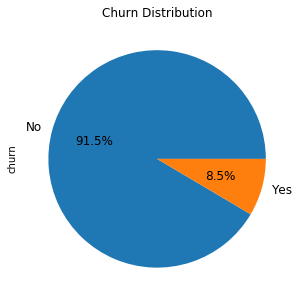

In [53]:
# Let's check percentage of churners

ax = (df['churn'].value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_title('Churn Distribution', fontsize = 12)

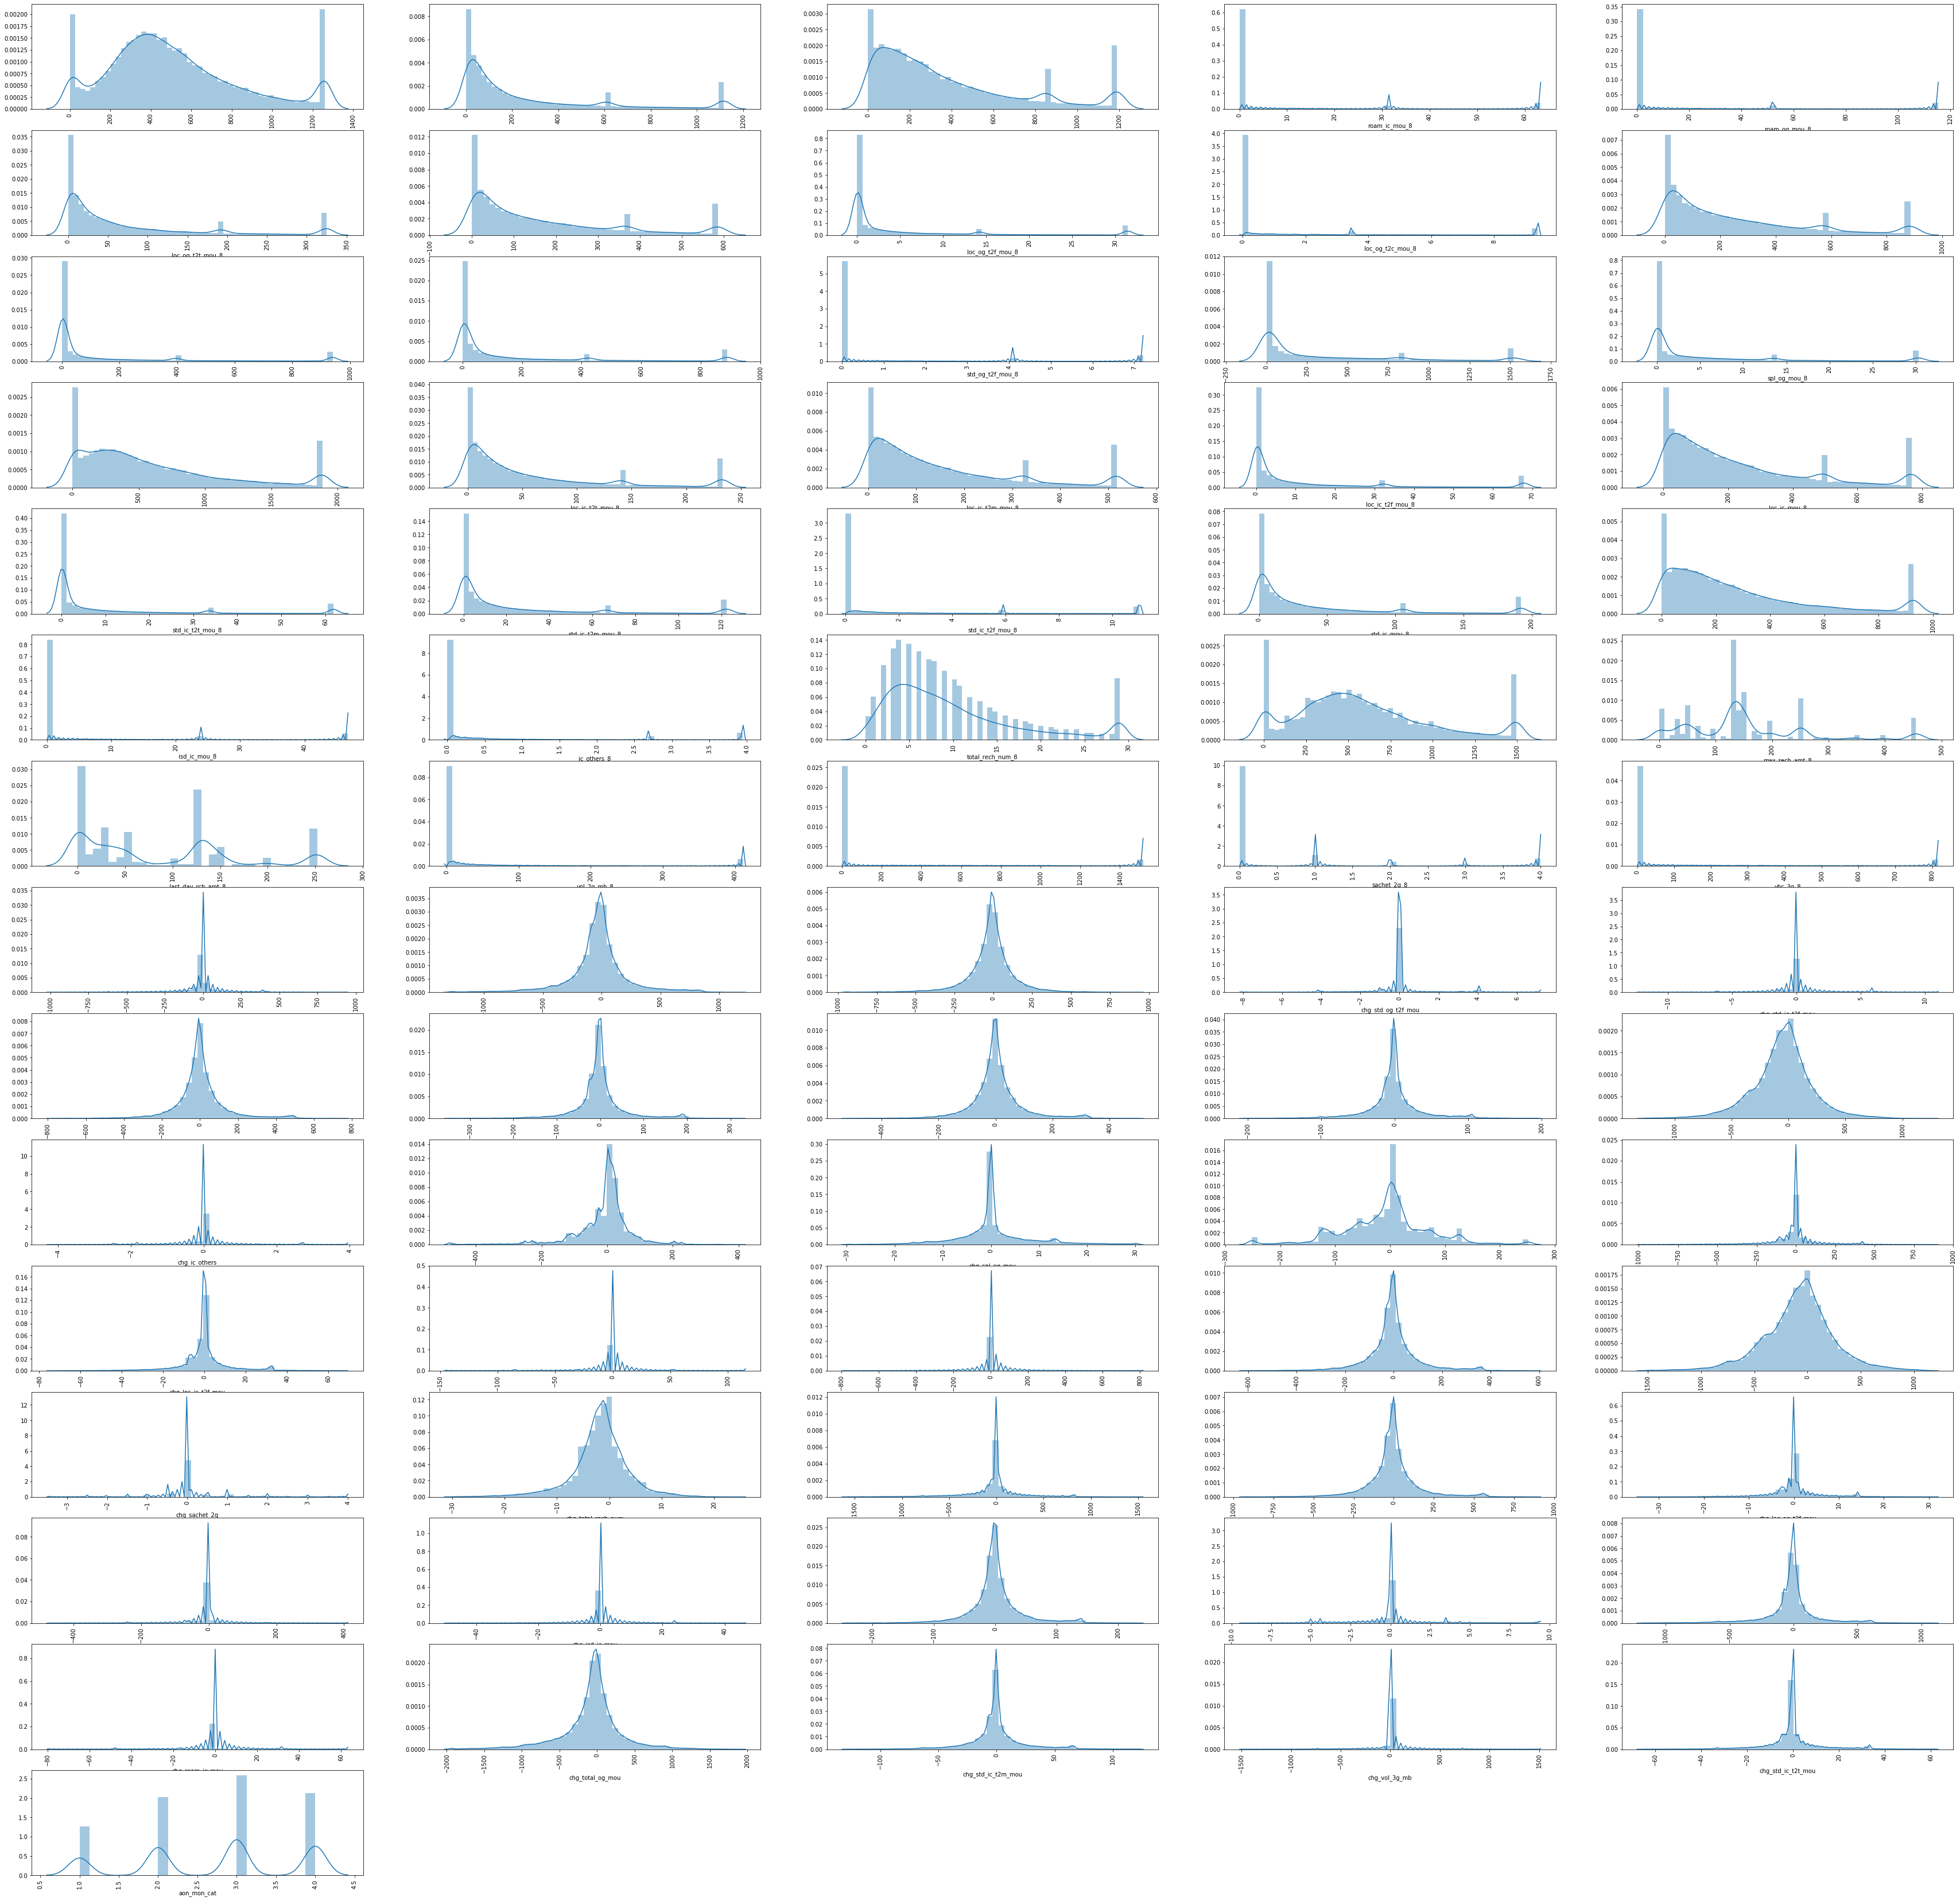

In [54]:
# Let's look into the distribution of each numeric variable

plt.figure(figsize=(60, 60))
i = 1
for col in df.columns:
    if(col == 'churn'):
        continue
    plt.subplot(15, 5, i)
    plt.xticks(rotation = 90)              
    sns.distplot(df[col]);
    i = i + 1    


In [55]:
# There are some categorical columns

cat_columns = [c for c in df.columns if df[c].nunique() <= 10]

In [56]:
cat_columns

['sachet_2g_8', 'churn', 'aon_mon_cat']

In [57]:
# Plot a bar plot of Series with index on x-axis and values on y-axis. Also draws numbers on the graph

def bar_plt_series(series, display_values = True):
    plt = sns.barplot(x=series.index, y=series.values, order = series.index)
    
    # For displaying values in bar plot
    if display_values == True:
        for i, item in series.reset_index(drop = True).sort_values(ascending = False).iteritems():
            plt.text(i, item, str(round(item/len(df)*100, 2)) + '%', color="black", ha="center")

    return plt

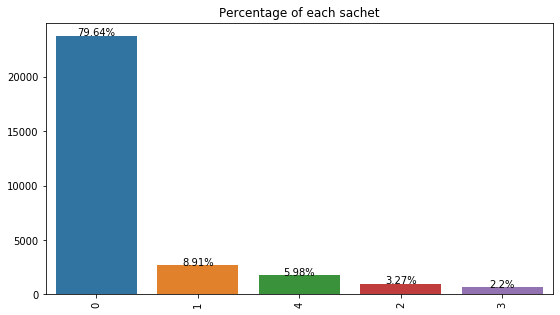

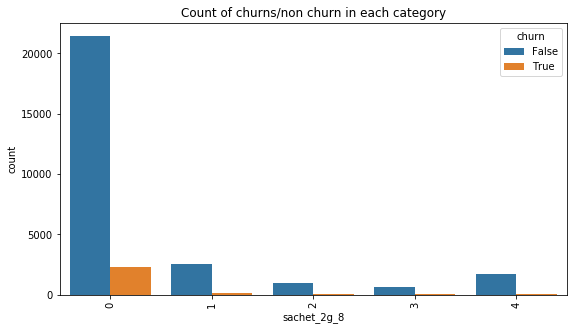

In [58]:
# Let's check the distribuion

plt.figure(figsize = (20,5))
plt.subplot(121)
plt.title('Percentage of each sachet')
plt.xticks(rotation = 90)
plt_purpose = bar_plt_series(df['sachet_2g_8'].value_counts())

plt.figure(figsize = (20,5))
plt.subplot(122)
plt.title('Count of churns/non churn in each category')
plt.xticks(rotation = 90)
sns.countplot(x="sachet_2g_8", hue="churn", data=df)

plt.show()

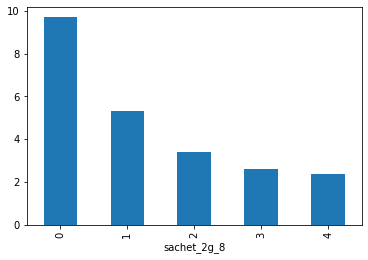

In [59]:
# Percentage churners in each category

(df[df.churn == True].groupby('sachet_2g_8')['sachet_2g_8'].count() * 100 / df.groupby('sachet_2g_8')['sachet_2g_8'].count()).plot.bar()

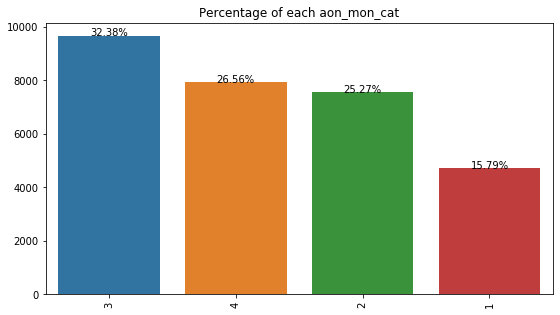

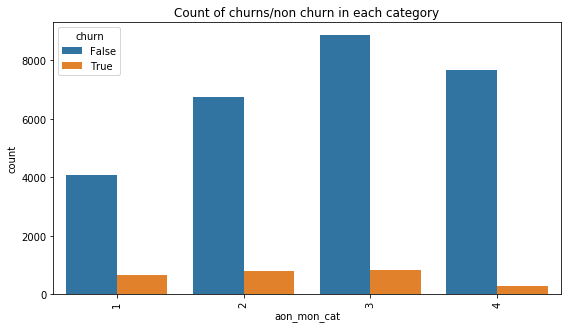

In [60]:
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.title('Percentage of each aon_mon_cat')
plt.xticks(rotation = 90)
plt_purpose = bar_plt_series(df['aon_mon_cat'].value_counts())

plt.figure(figsize = (20,5))
plt.subplot(122)
plt.title('Count of churns/non churn in each category')
plt.xticks(rotation = 90)
sns.countplot(x="aon_mon_cat", hue="churn", data=df)

plt.show()

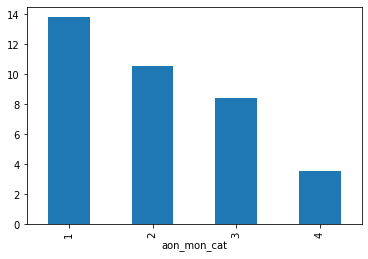

In [61]:

(df[df.churn == True].groupby('aon_mon_cat')['aon_mon_cat'].count() * 100 / df.groupby('aon_mon_cat')['aon_mon_cat'].count()).plot.bar()

Except the 4th category, all others witnessed comparable range of churners

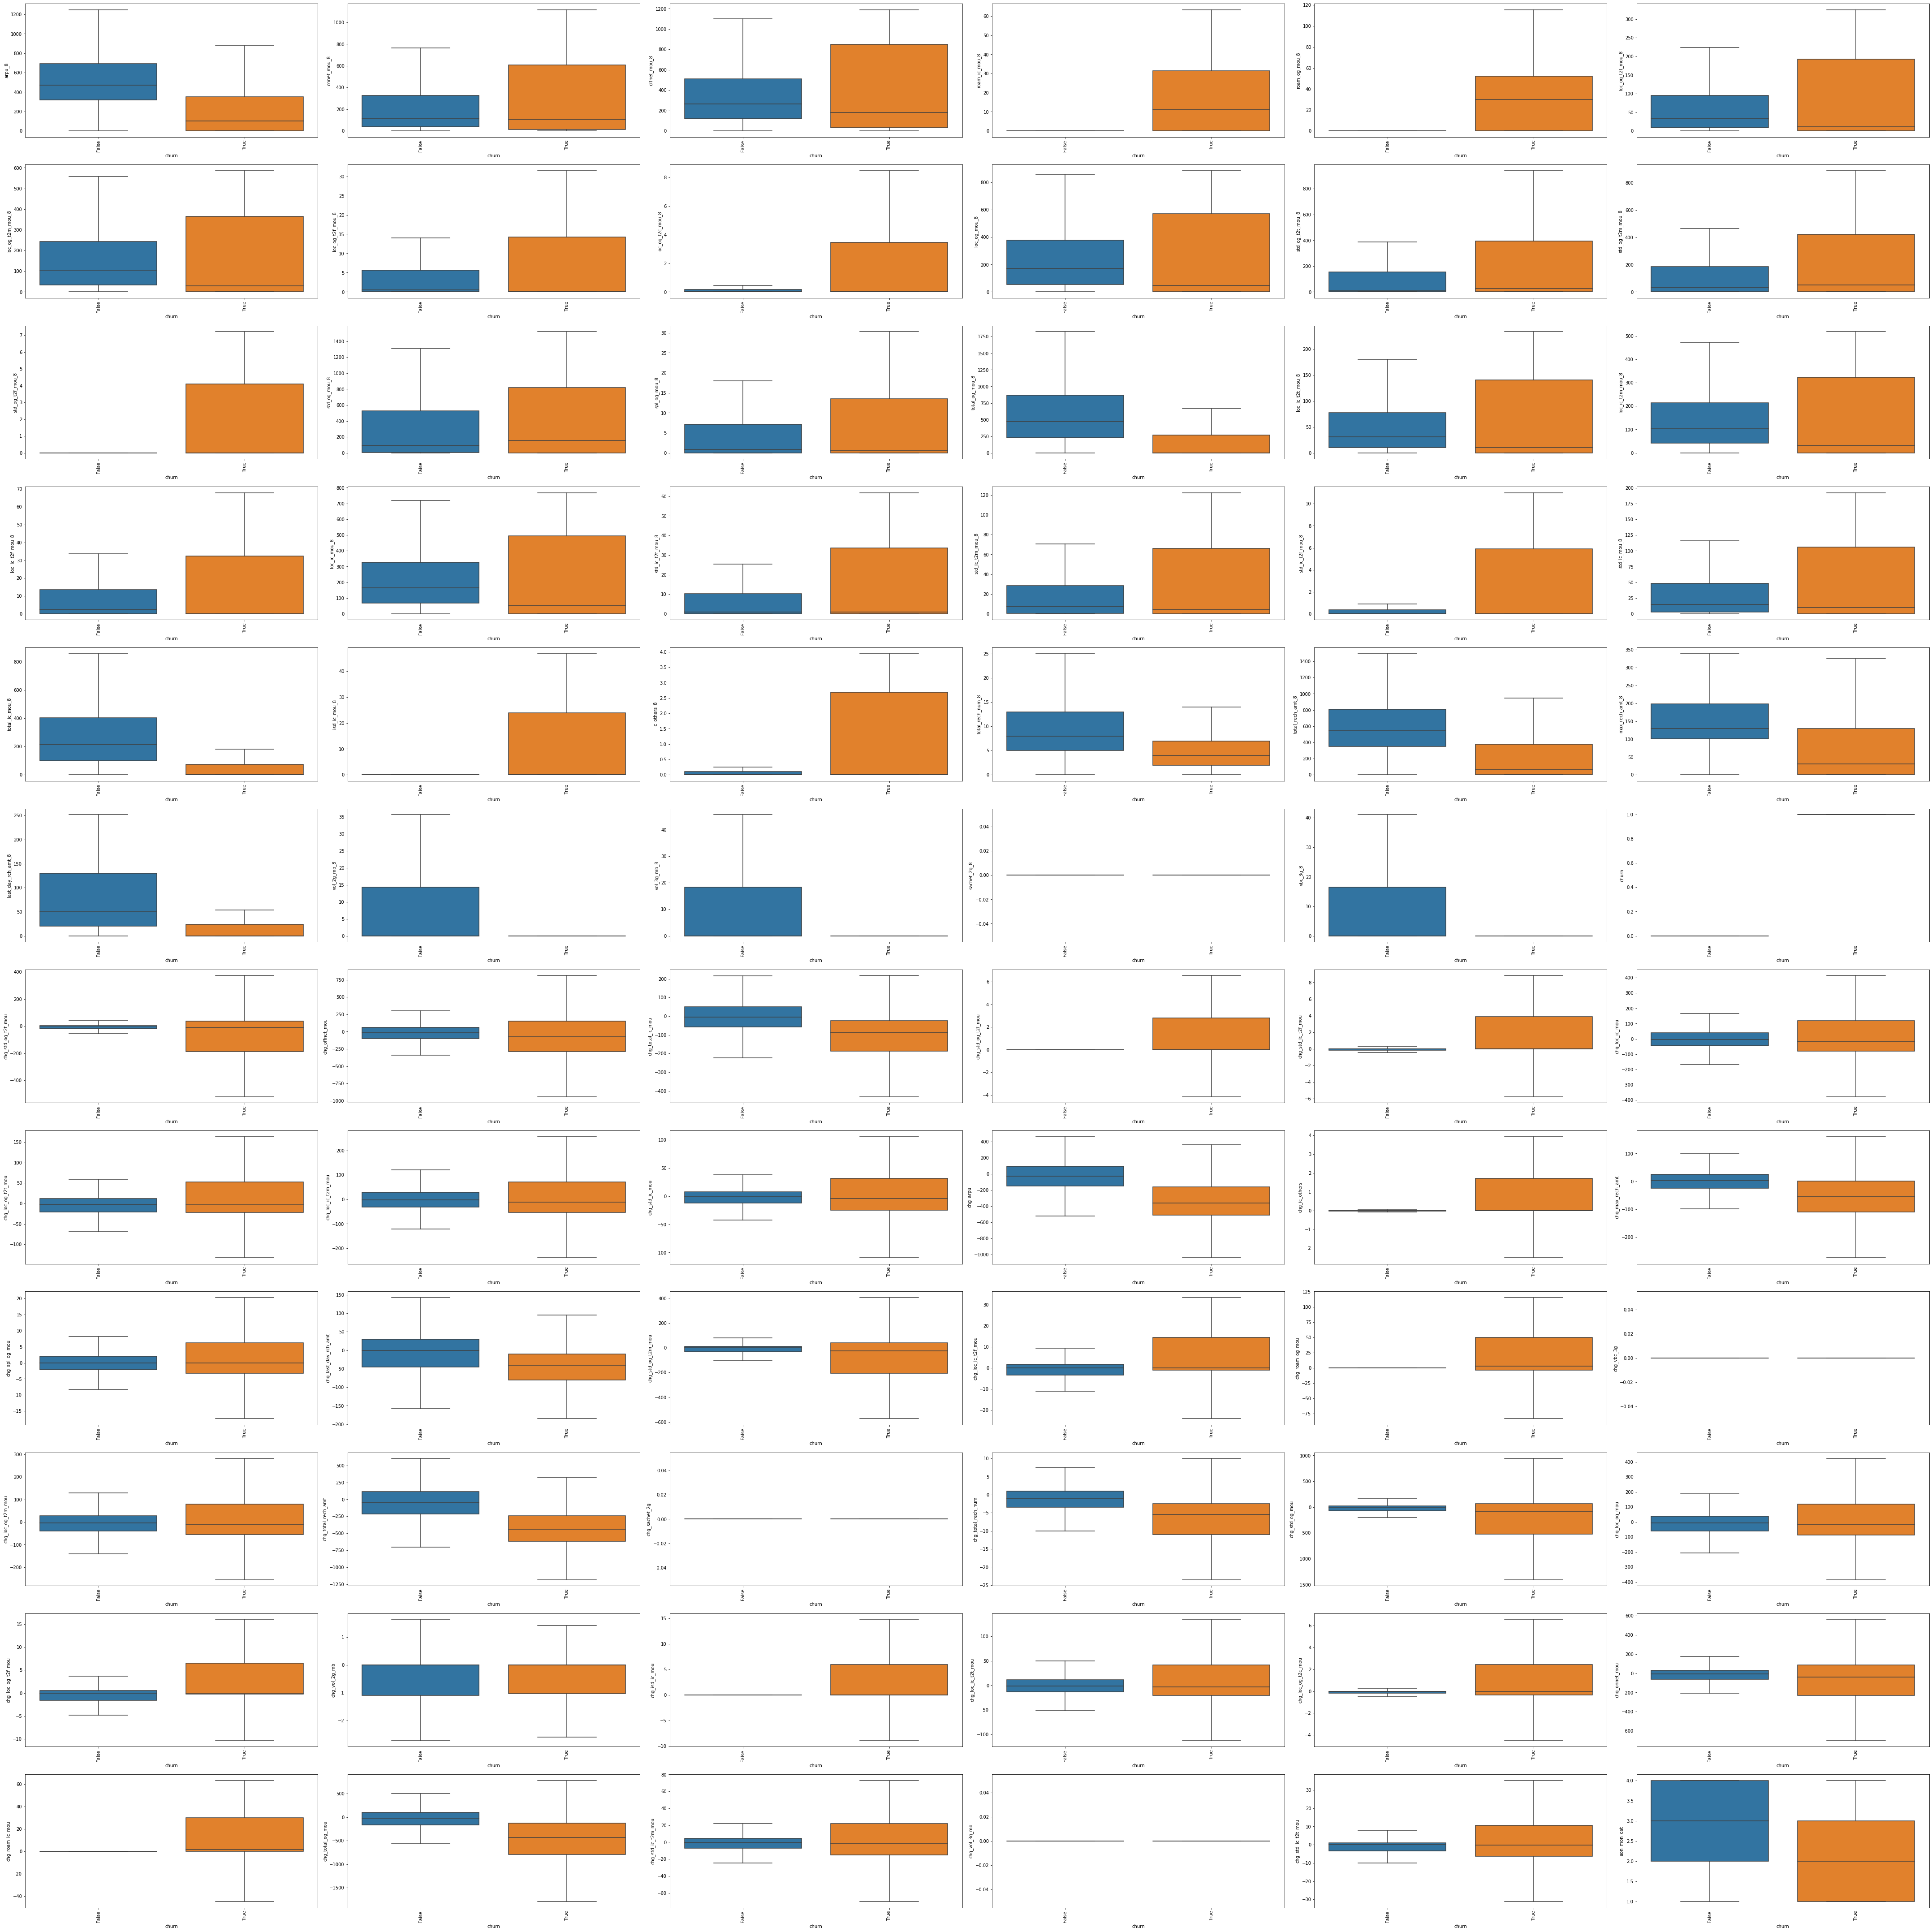

In [62]:
plt.figure(figsize=(60, 60))
i = 1
for col in df.columns:
    plt.subplot(12, 6, i)
    plt.xticks(rotation = 90)
    sns.boxplot(x = 'churn', y = col, data = df, showfliers=False)
    i = i + 1

    
plt.tight_layout()
plt.show()

From the above box plots, we can see that many columns seem to have direct impact on 'churn'. 
To name a few, 
- arpu_8
- roam_ic_mou_8
- roam_og_mou_8
- total_ic_mou_8
- total_rech_num_8
- total_rech_amt_8
- man_rech_amt_8
- aon_mon_cat
- total_og_mou_8

# Modeling

In [63]:
# assign y and X

y = df.pop('churn')
X = df

In [64]:
# split train and test records

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [65]:
# lets find distribution of churners in train and test. Both should be close

y_train.sum()/len(y_train), y_test.sum()/len(y_test)

(0.08527428380123392, 0.0846909172059808)

In [66]:
# scale the variables
columns = X_train.columns


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [67]:
# Lets perform pca

pca = PCA()

In [68]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [69]:
pca.components_

array([[ 1.65855236e-01,  1.29993778e-01,  1.80548276e-01, ...,
         2.65320736e-02,  1.13198425e-01,  1.74929562e-02],
       [-2.26395560e-01, -8.97862012e-02, -2.63415111e-02, ...,
        -8.33745913e-02,  7.51394214e-02,  2.54591969e-02],
       [ 1.23335317e-01, -1.47727045e-01, -2.76638667e-02, ...,
         8.01138816e-02, -8.47299383e-02,  1.57356522e-01],
       ...,
       [ 3.75358771e-02, -2.84445234e-01, -8.33668168e-03, ...,
         1.21145909e-03, -3.81168169e-03,  6.47181632e-04],
       [-5.77113235e-01, -6.02744830e-03, -1.09086708e-03, ...,
        -1.11003710e-03, -2.93115111e-03,  7.55843473e-04],
       [-2.09548198e-04,  2.51086881e-01,  2.30602936e-01, ...,
        -6.70297605e-04, -1.17739560e-02,  9.43392532e-04]])

In [70]:
np.cumsum(pca.explained_variance_ratio_)

array([0.15984364, 0.23944637, 0.31135309, 0.35683866, 0.39742099,
       0.43343345, 0.46882296, 0.50078527, 0.52991939, 0.55648138,
       0.58106852, 0.60322775, 0.62378359, 0.64356282, 0.66112619,
       0.67850651, 0.69542312, 0.71224971, 0.72846108, 0.74407042,
       0.75908543, 0.77400245, 0.78831158, 0.80218931, 0.81523043,
       0.8275742 , 0.83937164, 0.85072492, 0.8614291 , 0.87128164,
       0.88061958, 0.88954277, 0.89794873, 0.90600748, 0.91371008,
       0.92120092, 0.92794961, 0.93455339, 0.9409623 , 0.94689667,
       0.95181725, 0.95622506, 0.96043584, 0.9644866 , 0.96819621,
       0.97181562, 0.97525334, 0.97848356, 0.98079021, 0.98292896,
       0.98488417, 0.98668566, 0.98843356, 0.99012547, 0.99146281,
       0.99270076, 0.99390023, 0.99488703, 0.99566783, 0.99643488,
       0.99716885, 0.99770548, 0.99821435, 0.99862405, 0.99896101,
       0.99924897, 0.99952617, 0.99969509, 0.99982186, 0.99992496,
       1.        ])

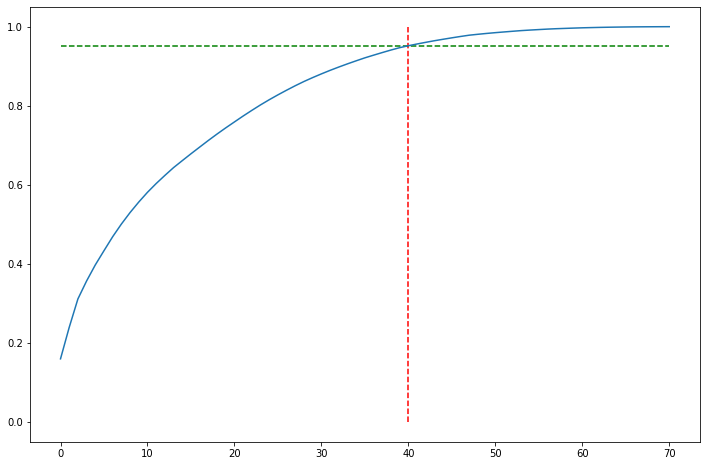

In [71]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=40, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=70, xmin=0, colors="g", linestyles="--")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [72]:
# 90% variance is explained by 19 components. Lets use these to build model


pca_final = IncrementalPCA(n_components=40)

In [73]:
# Fit and transform for 19 components

X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.fit_transform(X_test)

In [74]:
# Lets try Logistic Regression
# class_weight will take care of class imbalance

logreg = LogisticRegression(class_weight='balanced')

logreg.fit(X_train_pca, y_train)

C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
# lets predict values and find important metrics

y_train_pred_logreg = logreg.predict(X_train_pca)

classification_train_logreg = metrics.classification_report(y_train, y_train_pred_logreg)
print('Classification report for train:')
print(classification_train_logreg)

metrics.confusion_matrix(y_train, y_train_pred_logreg)

Classification report for train:
              precision    recall  f1-score   support

       False       0.98      0.84      0.90     19126
        True       0.32      0.82      0.46      1783

    accuracy                           0.84     20909
   macro avg       0.65      0.83      0.68     20909
weighted avg       0.92      0.84      0.87     20909



array([[16065,  3061],
       [  323,  1460]], dtype=int64)

Logistic regression has a recall of 0.82 and specificity of 0.84.

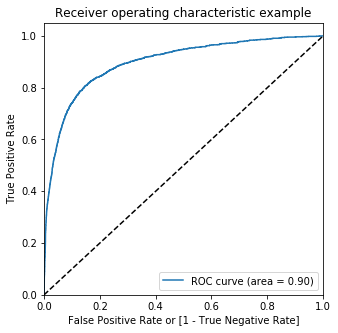

In [76]:
# Checking Roc curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

y_train_proba_logreg = logreg.predict_proba(X_train_pca)
y_train_churn_proba_logreg = y_train_proba_logreg[:,1]

draw_roc(y_train, y_train_churn_proba_logreg)

### ROC AUC score is 0.90

## Hyper Paramter tunning - Logistic Regression
Since the auc score is good and also recall is good, lets try tuning hyper parameters.

In [77]:
# lets try tuning following 'penalty' and C

# Create the parameter grid based on the results of random search 
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10] 
}
# Create a based model
model_logreg = LogisticRegression(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model_logreg, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, scoring='recall')

In [78]:
# Fit the grid search to the data

grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   10.2s finished
C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [79]:
# lets check results

pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C param_penalty                       params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
0        0.230382      0.022716         0.025931        0.011683     0.1            l1  {'C': 0.1, 'penalty': 'l1'}           0.843137           0.789916           0.817927           0.772472           0.837079         0.812108        0.027143               16
1        0.356443      0.005374         0.006584        0.002325     0.1            l2  {'C': 0.1, 'penalty': 'l2'}           0.843137           0.789916           0.815126           0.778090           0.839888         0.813233        0.026027                1
2        0.235369      0.018445         0.005585        0.000799     0.5            l1  {'C': 0.5, 'penalty': 'l1'}           0.843137           0.789916           0.815126           0.778090           0.839888         0.813233        0.026027                1
3        0.335900      0.013386         0.005586        0.000798     0.5            l2  {'C': 0.5, 'penalty': 'l2'}           0.843137           0.789916           0.815126           0.778090           0.839888         0.813233        0.026027                1
4        0.231979      0.005969         0.005785        0.000399       1            l1    {'C': 1, 'penalty': 'l1'}           0.843137           0.789916           0.815126           0.778090           0.839888         0.813233        0.026027                1
5        0.339491      0.022360         0.005785        0.000978       1            l2    {'C': 1, 'penalty': 'l2'}           0.843137           0.789916           0.815126           0.778090           0.839888         0.813233        0.026027                1
6        0.251925      0.012782         0.007581        0.002793       2            l1    {'C': 2, 'penalty': 'l1'}           0.843137           0.789916           0.815126           0.778090           0.839888         0.813233        0.026027                1
7        0.373799      0.018491         0.006381        0.000488       2            l2    {'C': 2, 'penalty': 'l2'}           0.843137           0.789916           0.815126           0.778090           0.839888         0.813233        0.026027                1
8        0.277258      0.013717         0.006183        0.001164       3            l1    {'C': 3, 'penalty': 'l1'}           0.843137           0.789916           0.815126           0.778090           0.839888         0.813233        0.026027                1
9        0.381378      0.025964         0.007182        0.002475       3            l2    {'C': 3, 'penalty': 'l2'}           0.843137           0.789916           0.815126           0.778090           0.839888         0.813233        0.026027                1
10       0.240753      0.011100         0.005785        0.000399       4            l1    {'C': 4, 'penalty': 'l1'}           0.843137           0.789916           0.815126           0.778090           0.839888         0.813233        0.026027                1
11       0.346472      0.012829         0.005986        0.000891       4            l2    {'C': 4, 'penalty': 'l2'}           0.843137           0.789916           0.815126           0.778090           0.839888         0.813233        0.026027                1
12       0.234572      0.003753         0.005586        0.000487       5            l1    {'C': 5, 'penalty': 'l1'}           0.843137           0.789916           0.815126           0.778090           0.839888         0.813233        0.026027                1
13       0.337296      0.007006         0.007979        0.004504       5            l2    {'C': 5, 'penalty': 'l2'}           0.843137           0.789916           0.815126           0.778090           0.839888         0.813233        0.026027                1
14       0.244544      0.006777         0.006384        0.001352      10            l1   

In [80]:
# Above table shows best combination is {'C': 0.1, 'penalty': 'l2'}

grid_search.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
logreg = grid_search.best_estimator_

logreg.fit(X_train_pca, y_train)

C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
# lets predict values and find important metrics

y_train_pred_logreg = logreg.predict(X_train_pca)

classification_train_logreg = metrics.classification_report(y_train, y_train_pred_logreg)
print('Classification report for train=')
print(classification_train_logreg)

metrics.confusion_matrix(y_train, y_train_pred_logreg)

Classification report for train=
              precision    recall  f1-score   support

       False       0.98      0.84      0.90     19126
        True       0.32      0.82      0.46      1783

    accuracy                           0.84     20909
   macro avg       0.65      0.83      0.68     20909
weighted avg       0.92      0.84      0.87     20909



array([[16055,  3071],
       [  322,  1461]], dtype=int64)

In [83]:
# Finding optimal cutoff
# Let's create columns with different probability cutoffs 

y_train_pred_final_df = pd.DataFrame(y_train_proba_logreg[:,1], columns=['Churn_Proba'])
y_train_pred_final_df['Actual_Churn'] = np.array(y_train)

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final_df[i]= y_train_pred_final_df.Churn_Proba.map(lambda x: 1 if x > i else 0)
y_train_pred_final_df['Churn'] = y_train_pred_logreg

In [84]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_df.Actual_Churn, y_train_pred_final_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.085274  1.000000  0.000000
0.1   0.1  0.386628  0.972518  0.332009
0.2   0.2  0.569420  0.941110  0.534769
0.3   0.3  0.693194  0.905777  0.673377
0.4   0.4  0.778086  0.863152  0.770156
0.5   0.5  0.838156  0.818845  0.839956
0.6   0.6  0.878569  0.756590  0.889940
0.7   0.7  0.905352  0.685923  0.925808
0.8   0.8  0.922952  0.560852  0.956708
0.9   0.9  0.932565  0.392036  0.982955


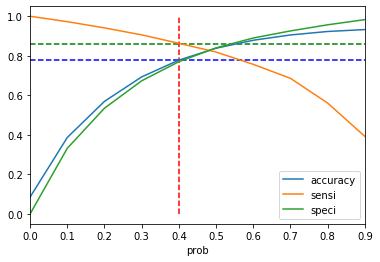

In [85]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.40, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.86, xmax=0.9, xmin=0, colors="g", linestyles="--")
plt.hlines(y=0.78, xmax=0.9, xmin=0, colors="b", linestyles="--")
plt.show()

In [86]:
# At threshold of 0.40, we see Sensitivity is at 0.85, Accuracy is at 0.78 and Specificity is at 0.78
# As we have learnt that retaining the customer is more important, we can choose this threshold

y_test_proba_logreg = logreg.predict_proba(X_test_pca)
y_test_churn_proba_logreg = y_test_proba_logreg[:,1]
y_test_pred_logreg = y_test_churn_proba_logreg >= 0.40

accuracy_test_logreg = metrics.accuracy_score(y_test, y_test_pred_logreg)

print('Logistic Regression (Test)')
print('Accuracy for test=', accuracy_test_logreg)

recall_test_logreg = metrics.recall_score(y_test, y_test_pred_logreg)
print('Recall for test=', recall_test_logreg)


classification_test_logreg = metrics.classification_report(y_test, y_test_pred_logreg)
print('Classification report for train=')
print(classification_test_logreg)

Logistic Regression (Test)
Accuracy for test= 0.6992858736889087
Recall for test= 0.839262187088274
Classification report for train=
              precision    recall  f1-score   support

       False       0.98      0.69      0.81      8203
        True       0.20      0.84      0.32       759

    accuracy                           0.70      8962
   macro avg       0.59      0.76      0.56      8962
weighted avg       0.91      0.70      0.77      8962



Logistic regression is giving decent results with cut off 0.40

### We have chosen cut off as 0.4. If we want more agressive model, then we can reduce the thrshold to 0.35 or even to 0.30 to get more better results.
we can take this call based on business input

# Support Vector Machines

In [87]:
# SVC

svc = SVC(class_weight='balanced', gamma='auto') #gamma='auto'to avoid warning
svc.fit(X_train_pca, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [88]:
y_train_pred_svc = svc.predict(X_train_pca)

print('Support Vector Classifier:')
classification_train_svc = metrics.classification_report(y_train, y_train_pred_svc)
print('Classification report for train')
print(classification_train_svc)

Support Vector Classifier:
Classification report for train
              precision    recall  f1-score   support

       False       1.00      0.93      0.96     19126
        True       0.56      0.96      0.71      1783

    accuracy                           0.93     20909
   macro avg       0.78      0.95      0.84     20909
weighted avg       0.96      0.93      0.94     20909



In [89]:
# Lets tune hyper parameters for SVC
# lets try tuning following kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’}, degree, gamma

# Create the parameter grid based on the results of random search 
param_grid = {
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
# Create a based model
model_svc = SVC(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model_svc, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, scoring='recall')


In [90]:
# Fit the grid search to the data

grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight='balanced',
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [91]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_gamma param_kernel                                   params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
0      72.779496      2.264817         2.542996        0.227107       scale       linear   {'gamma': 'scale', 'kernel': 'linear'}           0.845938           0.789916           0.806723           0.766854           0.834270         0.808743        0.028804                1
1      22.700070      0.857431         2.789139        0.100398       scale          rbf      {'gamma': 'scale', 'kernel': 'rbf'}           0.784314           0.773109           0.767507           0.730337           0.806180         0.772290        0.024804                3
2      24.612352      0.820662         3.182486        0.118833       scale      sigmoid  {'gamma': 'scale', 'kernel': 'sigmoid'}           0.607843           0.635854           0.649860           0.612360           0.581461         0.617477        0.023674                5
3      72.712474      1.888402         2.311617        0.077795        auto       linear    {'gamma': 'auto', 'kernel': 'linear'}           0.845938           0.789916           0.806723           0.766854           0.834270         0.808743        0.028804                1
4      22.794818      0.090424         2.958084        0.096962        auto          rbf       {'gamma': 'auto', 'kernel': 'rbf'}           0.739496           0.722689           0.728291           0.685393           0.738764         0.722929        0.019813                4
5      26.672441      2.372089         3.416860        0.340791        auto      sigmoid   {'gamma': 'auto', 'kernel': 'sigmoid'}           0.560224           0.579832           0.610644           0.556180           0.528090         0.566996        0.027372                6

In [92]:
# best estimator is 

grid_search.best_estimator_

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [93]:
svc = grid_search.best_estimator_

y_train_pred_svc = svc.predict(X_train_pca)

print('Support Vector Classifier:')
classification_train_svc = metrics.classification_report(y_train, y_train_pred_svc)
print('Classification report for train:')
print(classification_train_svc)

Support Vector Classifier:
Classification report for train:
              precision    recall  f1-score   support

       False       0.98      0.85      0.91     19126
        True       0.34      0.81      0.48      1783

    accuracy                           0.85     20909
   macro avg       0.66      0.83      0.69     20909
weighted avg       0.93      0.85      0.87     20909



In [94]:
svc = grid_search.best_estimator_

y_test_pred_svc = svc.predict(X_test_pca)

print('Support Vector Classifier:')
classification_test_svc = metrics.classification_report(y_test, y_test_pred_svc)
print('Classification report for test:')
print(classification_test_svc)

Support Vector Classifier:
Classification report for test:
              precision    recall  f1-score   support

       False       0.97      0.81      0.89      8203
        True       0.27      0.73      0.39       759

    accuracy                           0.81      8962
   macro avg       0.62      0.77      0.64      8962
weighted avg       0.91      0.81      0.84      8962



### SVC is also giving good result but not as good as LogisticRegression
- SVC results are not good for recall.
- Recall score looks a bit overfit (Train recall is 0.81 and Test recall is 0.74)

# Random Forest Classifier

In [95]:
# Running the random forest with default parameters.

rfc = RandomForestClassifier(class_weight='balanced')

In [96]:
# Fit with default parameters

rfc.fit(X_train_pca,y_train)
y_pred_rfc = rfc.predict(X_test_pca)

C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [97]:
y_train_pred_rfc = rfc.predict(X_train_pca)

print('Random Forest:')
classification_train_rfc = metrics.classification_report(y_train, y_train_pred_rfc)
print('Classification report for train:')
print(classification_train_rfc)

Random Forest:
Classification report for train:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99     19126
        True       1.00      0.89      0.94      1783

    accuracy                           0.99     20909
   macro avg       0.99      0.95      0.97     20909
weighted avg       0.99      0.99      0.99     20909



In [98]:
# Hyper parameter tuning

param_grid = {
    'min_samples_leaf': [500, 1000, 1500, 2000],
    'min_samples_split': [500, 1000, 1500, 2000],
    'n_estimators': [50,100,200,300]
}
# Create a based model
rf = RandomForestClassifier(class_weight= 'balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, scoring='recall')

# 'criterion': ['gini', 'entropy'],
#     'oob_score': [True, False],
#     'class_weight': ['balanced_subsample', 'balanced']

In [99]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 12.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [100]:
# scores of GridSearch CV

pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_min_samples_leaf param_min_samples_split param_n_estimators                                             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
0        4.325827      0.051230         0.042686        0.002777                    500                     500                 50  {'min_samples_leaf': 500, 'min_samples_split':...           0.795518           0.775910           0.778711           0.769663           0.764045         0.776771        0.010663               60
1        8.251924      0.304069         0.078391        0.003969                    500                     500                100  {'min_samples_leaf': 500, 'min_samples_split':...           0.812325           0.778711           0.789916           0.766854           0.778090         0.785182        0.015410               37
2       16.052256      0.156357         0.149998        0.006326                    500                     500                200  {'min_samples_leaf': 500, 'min_samples_split':...           0.809524           0.764706           0.792717           0.780899           0.792135         0.787997        0.014804               27
3       24.326120      0.165600         0.228788        0.020580                    500                     500                300  {'min_samples_leaf': 500, 'min_samples_split':...           0.801120           0.770308           0.781513           0.778090           0.780899         0.782387        0.010182               48
4        4.036201      0.075385         0.041090        0.002394                    500                    1000                 50  {'min_samples_leaf': 500, 'min_samples_split':...           0.806723           0.764706           0.773109           0.769663           0.775281         0.777898        0.014851               58
5        7.844813      0.073655         0.079188        0.003489                    500                    1000                100  {'min_samples_leaf': 500, 'min_samples_split':...           0.806723           0.773109           0.781513           0.778090           0.761236         0.780136        0.014964               57
6       15.998595      0.131421         0.159174        0.016286                    500                    1000                200  {'min_samples_leaf': 500, 'min_samples_split':...           0.812325           0.773109           0.787115           0.789326           0.783708         0.789118        0.012871               19
7       24.360628      0.361779         0.260504        0.031326                    500                    1000                300  {'min_samples_leaf': 500, 'min_samples_split':...           0.812325           0.770308           0.787115           0.780899           0.778090         0.785749        0.014345               34
8        3.784674      0.012979         0.038897        0.000002                    500                    1500                 50  {'min_samples_leaf': 500, 'min_samples_split':...           0.798319           0.778711           0.792717           0.761236           0.778090         0.781817        0.012948               52
9        7.578325      0.158436         0.076995        0.003300                    500                    1500                100  {'min_samples_leaf': 500, 'min_samples_split':...           0.801120           0.775910           0.798319           0.789326           0.778090         0.788554        0.010230               24
10      15.939757      0.373851         0.166155        0.022765                    500                    1500                200  {'min_samples_leaf': 500, 'min_samples_split':...           0.815126           0.764706           0.795518           0.778090           0.764045         0.783500        0.019524               45
11      24.482103      0.796899         0.242153        0.014139                

In [101]:
# Running best estimator for train

rfc = grid_search.best_estimator_

rfc.fit(X_train_pca,y_train)

y_train_pred_rfc = rfc.predict(X_train_pca)

print('Random Forest Classifier:')
classification_train_rfc = metrics.classification_report(y_train, y_train_pred_rfc)
print('Classification report for train:')
print(classification_train_rfc)

Random Forest Classifier:
Classification report for train:
              precision    recall  f1-score   support

       False       0.98      0.86      0.92     19126
        True       0.35      0.78      0.48      1783

    accuracy                           0.86     20909
   macro avg       0.66      0.82      0.70     20909
weighted avg       0.92      0.86      0.88     20909



In [102]:
# Lets run on test

y_test_pred_rfc = rfc.predict(X_test_pca)

print('Random Forest Classifier:')
classification_test_rfc = metrics.classification_report(y_test, y_test_pred_rfc)
print('Classification report for test:')
print(classification_test_rfc)

Random Forest Classifier:
Classification report for test:
              precision    recall  f1-score   support

       False       0.97      0.79      0.87      8203
        True       0.24      0.71      0.35       759

    accuracy                           0.78      8962
   macro avg       0.60      0.75      0.61      8962
weighted avg       0.91      0.78      0.82      8962



In [103]:
# Lets try 2nd best estimator

rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1000,
                       min_samples_split=2000, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

rfc.fit(X_train_pca,y_train)

y_train_pred_rfc = rfc.predict(X_train_pca)

print('Random Forest Classifier:')
classification_train_rfc = metrics.classification_report(y_train, y_train_pred_rfc)
print('Classification report for train:')
print(classification_train_rfc)

Random Forest Classifier:
Classification report for train:
              precision    recall  f1-score   support

       False       0.98      0.85      0.91     19126
        True       0.34      0.80      0.47      1783

    accuracy                           0.85     20909
   macro avg       0.66      0.83      0.69     20909
weighted avg       0.92      0.85      0.87     20909



In [104]:
# Lets run on test

y_test_pred_rfc = rfc.predict(X_test_pca)

print('Random Forest Classifier:')
classification_test_rfc = metrics.classification_report(y_test, y_test_pred_rfc)
print('Classification report for test:')
print(classification_test_rfc)

Random Forest Classifier:
Classification report for test:
              precision    recall  f1-score   support

       False       0.97      0.77      0.86      8203
        True       0.24      0.75      0.36       759

    accuracy                           0.77      8962
   macro avg       0.60      0.76      0.61      8962
weighted avg       0.91      0.77      0.82      8962



## Random Forest Classifier seems to be overfitting the data
Also the results are not better than LogisticRegression

# XGBoost Classifier

In [105]:
# With all the default values
xgboost_model = XGBClassifier(random_state=100)
xgboost_model.fit(X_train_pca, y_train)

y_pred_xgboost = xgboost_model.predict(X_test_pca)

accuracy_xgboost = metrics.accuracy_score(y_test, y_pred_xgboost)

print('XGB accuracy:', accuracy_xgboost)

XGB accuracy: 0.913412184780183


In [106]:
xgb = XGBClassifier(
    learning_rate=0.8,
    max_depth=5, min_child_weight=1, gamma=0,subsample=0.8,colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27)

xgb.fit(X_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.8, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [107]:
y_pred = xgb.predict(X_test_pca)

acc_xgb = metrics.accuracy_score(y_test, y_pred)

print('XGB accuracy:', acc_xgb)

XGB accuracy: 0.9159785762106673


In [108]:
recall_xgb = metrics.recall_score(y_test, y_pred)
print(recall_xgb)

metrics.confusion_matrix(y_test, y_pred)

0.25296442687747034


array([[8017,  186],
       [ 567,  192]], dtype=int64)

In [109]:
# Let's tune learning_rate

param_grid = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5]}
xgb = XGBClassifier(
    learning_rate=0.5, n_estimators=600,
    max_depth=5, min_child_weight=1, gamma=0,subsample=0.8,colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27)

model_cv = GridSearchCV(estimator = xgb, 
                        param_grid = param_grid, 
                        scoring='recall', 
                        cv = 5,                         
                         verbose = 1,
                        return_train_score=True) 
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  9.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.5, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=600, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
            

In [110]:
y_pred = model_cv.predict(X_test_pca)

acc_xgb = metrics.accuracy_score(y_test, y_pred)

print('XGB accuracy:', acc_xgb)

recall_xgb = metrics.recall_score(y_test, y_pred)
print(recall_xgb)

metrics.confusion_matrix(y_test, y_pred)


XGB accuracy: 0.912631109127427
0.15019762845849802


array([[8065,  138],
       [ 645,  114]], dtype=int64)

In [111]:
pd.DataFrame(model_cv.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_learning_rate                     params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0      17.604503      0.562549         0.047473        0.001849              0.0001  {'learning_rate': 0.0001}           0.322129           0.271709           0.274510           0.297753           0.294944         0.292210        0.018260                6            0.306452            0.310659            0.298036            0.308339            0.289418          0.302581         0.007840
1      17.430769      0.197440         0.049468        0.002793               0.001   {'learning_rate': 0.001}           0.322129           0.274510           0.271709           0.297753           0.297753         0.292772        0.018379                5            0.309257            0.313464            0.300842            0.304835            0.296426          0.304965         0.006010
2      18.388805      0.260485         0.060639        0.006030                0.01    {'learning_rate': 0.01}           0.406162           0.369748           0.392157           0.365169           0.390449         0.384739        0.015195                4            0.530154            0.527349            0.504909            0.512964            0.512964          0.517668         0.009557
3      18.862737      0.180156         0.059242        0.001492                 0.1     {'learning_rate': 0.1}           0.417367           0.397759           0.394958           0.412921           0.401685         0.404939        0.008717                3            1.000000            1.000000            1.000000            1.000000            1.000000          1.000000         0.000000
4      18.221652      0.238204         0.067621        0.006226                 0.2     {'learning_rate': 0.2}           0.442577           0.378151           0.408964           0.424157           0.401685         0.411108        0.021635                2            1.000000            1.000000            1.000000            1.000000            1.000000          1.000000         0.000000
5      16.134037      0.578500         0.064029        0.005404                 0.5     {'learning_rate': 0.5}           0.431373           0.414566           0.411765           0.435393           0.410112         0.420642        0.010577                1            1.000000            1.000000            1.000000            1.000000            1.000000          1.000000         0.000000

In [112]:
model_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

## Tuning n_estimators

In [113]:
#
param_grid = {'n_estimators': [100, 200, 500, 700, 1000, 1500, 2000]}
xgb = XGBClassifier(
    max_depth=5, min_child_weight=1, gamma=0,subsample=0.8,colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27)

model_cv2 = GridSearchCV(estimator = xgb, 
                        param_grid = param_grid, 
                        scoring='recall', 
                        cv = 5,                         
                         verbose = 1,
                        return_train_score=True) 
model_cv2.fit(X_train_pca, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed: 15.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': [100, 200, 500, 700, 1000, 1500,
                                          2000]},
             pre_dispatch='2*n_jobs', refit=

In [114]:
y_pred = model_cv2.predict(X_test_pca)

acc_xgb = metrics.accuracy_score(y_test, y_pred)

print('XGB accuracy:', acc_xgb)

recall_xgb = metrics.recall_score(y_test, y_pred)
print(recall_xgb)

metrics.confusion_matrix(y_test, y_pred)

XGB accuracy: 0.9151975005579112
0.10540184453227931


array([[8122,   81],
       [ 679,   80]], dtype=int64)

In [115]:
model_cv2

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': [100, 200, 500, 700, 1000, 1500,
                                          2000]},
             pre_dispatch='2*n_jobs', refit=

Let's use the n_estimators instead using the learning rate directly.

## Tuning max_depth and min_child_weight

In [116]:
param_grid =  {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

# using the n_estimators from the previous step

xgb = XGBClassifier(n_estimators=500, gamma=0,subsample=0.8,colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27)

model_cv3 = GridSearchCV(estimator = xgb, 
                        param_grid = param_grid, 
                        scoring='recall', 
                        cv = 5,                         
                         verbose = 1,
                        return_train_score=True) 
model_cv3.fit(X_train_pca, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 24.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=500, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             pre_dispatch='2*n_jobs', refit=True, r

In [117]:
pd.DataFrame(model_cv3.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_max_depth param_min_child_weight                                   params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0       10.350709      1.000215         0.039495        0.013843               3                      1  {'max_depth': 3, 'min_child_weight': 1}           0.434174           0.375350           0.414566           0.424157           0.390449         0.407741        0.021740                6            0.692146            0.708976            0.697055            0.704975            0.681850          0.697000         0.009593
1        9.215146      0.154699         0.034109        0.003179               3                      3  {'max_depth': 3, 'min_child_weight': 3}           0.411765           0.383754           0.428571           0.410112           0.407303         0.408301        0.014351                4            0.677419            0.696353            0.673913            0.683952            0.663630          0.679054         0.010865
2        9.638415      0.398278         0.040094        0.006383               3                      5  {'max_depth': 3, 'min_child_weight': 5}           0.425770           0.375350           0.400560           0.415730           0.390449         0.401573        0.017880               10            0.664797            0.684432            0.668303            0.662228            0.658024          0.667557         0.009080
3       15.990222      0.260841         0.049667        0.000399               5                      1  {'max_depth': 5, 'min_child_weight': 1}           0.428571           0.386555           0.397759           0.432584           0.396067         0.408308        0.018624                3            0.999299            1.000000            1.000000            0.998598            0.998598          0.999299         0.000627
4       15.759639      0.484122         0.056449        0.006869               5                      3  {'max_depth': 5, 'min_child_weight': 3}           0.448179           0.403361           0.422969           0.426966           0.396067         0.419511        0.018439                1            0.996494            0.995792            0.993689            0.996496            0.995795          0.995653         0.001031
5       16.707517      3.613401         0.055093        0.009033               5                      5  {'max_depth': 5, 'min_child_weight': 5}           0.442577           0.389356           0.397759           0.426966           0.415730         0.414478        0.019277                2            0.986676            0.983871            0.983871            0.988087            0.985284          0.985558         0.001638
6       34.029196      0.377331         0.116542        0.006580               7                      1  {'max_depth': 7, 'min_child_weight': 1}           0.406162           0.400560           0.389356           0.410112           0.396067         0.400452        0.007325               11            1.000000            1.000000            1.000000            1.000000            1.000000          1.000000         0.000000
7       31.916053      0.588444         0.112986        0.007204               7                      3  {'max_depth': 7, 'min_child_weight': 3}           0.417367           0.392157           0.414566           0.401685           0.387640         0.402685        0.011789                9            1.000000            1.000000            1.000000            1.000000            1.000000          1.000000         0.000000
8       30.447773      0.486383         0.109358        0.012137               7                      5  {'max_depth': 7, 'min_child_weight': 5}           0.445378           0.383

In [118]:
y_pred = model_cv3.predict(X_test_pca)

acc_xgb = metrics.accuracy_score(y_test, y_pred)

print('XGB accuracy:', acc_xgb)

recall_xgb = metrics.recall_score(y_test, y_pred)
print('XGB recall:', recall_xgb)

metrics.confusion_matrix(y_test, y_pred)

XGB accuracy: 0.9149743360856951
XGB recall: 0.11725955204216074


array([[8111,   92],
       [ 670,   89]], dtype=int64)

In [119]:
model_cv3.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, n_estimators=500, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

Use these values for futher analysis.

## Tuning gamma

In [120]:
param_grid = { 
    'gamma':[i/10.0 for i in range(0,5)] 
}

xgb = XGBClassifier(n_estimators=500, learning_rate=0.300000012, gamma=0,subsample=0.8,colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27,  max_depth=3, min_child_weight=3)

model_cv4 = GridSearchCV(estimator = xgb, 
                        param_grid = param_grid, 
                        scoring='recall', 
                        cv = 5,                         
                         verbose = 1,
                        return_train_score=True) 
model_cv4.fit(X_train_pca, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  6.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=3, missing=None,
                                     n_estimators=500, n_jobs=1, nthread=4,
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             pre_dispatch='2*n_jobs', refit=True, return_trai

In [121]:
y_pred = model_cv4.predict(X_test_pca)

acc_xgb = metrics.accuracy_score(y_test, y_pred)

print('XGB accuracy:', acc_xgb)

recall_xgb = metrics.recall_score(y_test, y_pred)
print('XGB recall:', recall_xgb)

metrics.confusion_matrix(y_test, y_pred)

XGB accuracy: 0.9155322472662352
XGB recall: 0.233201581027668


array([[8028,  175],
       [ 582,  177]], dtype=int64)

In [122]:
pd.DataFrame(model_cv4.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_gamma          params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0       9.683462      0.218547         0.034401        0.006500           0  {'gamma': 0.0}           0.428571           0.392157           0.442577           0.432584           0.415730         0.422324        0.017367                3            0.977560            0.976157            0.982468            0.983181            0.981079          0.980089         0.002759
1      14.514297      1.229370         0.050096        0.003199         0.1  {'gamma': 0.1}           0.434174           0.403361           0.439776           0.412921           0.404494         0.418947        0.015191                5            0.971950            0.977560            0.983871            0.982481            0.975473          0.978267         0.004413
2      15.079743      0.619874         0.060325        0.009526         0.2  {'gamma': 0.2}           0.439776           0.397759           0.411765           0.426966           0.424157         0.420085        0.014279                4            0.973352            0.981767            0.978962            0.976875            0.972670          0.976725         0.003414
3      15.339520      1.457224         0.055531        0.011727         0.3  {'gamma': 0.3}           0.428571           0.397759           0.436975           0.432584           0.429775         0.425133        0.013989                1            0.978261            0.978962            0.981767            0.976174            0.975473          0.978127         0.002228
4      15.727760      1.312423         0.054432        0.004423         0.4  {'gamma': 0.4}           0.425770           0.425770           0.420168           0.432584           0.412921         0.423443        0.006569                2            0.978962            0.980365            0.979663            0.976875            0.975473          0.978268         0.001821

In [123]:
model_cv4.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.3,
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=500, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

## Tuning subsample and colsample_bytree

In [124]:
param_grid = { 
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}

xgb = XGBClassifier(n_estimators=500, learning_rate=0.300000012, gamma=0.4,subsample=0.8,colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27,  max_depth=3, min_child_weight=3)

model_cv5 = GridSearchCV(estimator = xgb, 
                        param_grid = param_grid, 
                        scoring='recall', 
                        cv = 5,                         
                         verbose = 1,
                        return_train_score=True) 
model_cv5.fit(X_train_pca, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 18.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0.4,
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=3, missing=None,
                                     n_estimators=500, n_jobs=1, nthread=4,
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'subsample': [0.6, 0.7, 0.8, 

In [125]:
y_pred = model_cv5.predict(X_test_pca)

acc_xgb = metrics.accuracy_score(y_test, y_pred)

print('XGB accuracy:', acc_xgb)

recall_xgb = metrics.recall_score(y_test, y_pred)
print('XGB recall:', recall_xgb)

metrics.confusion_matrix(y_test, y_pred)

XGB accuracy: 0.9109573755858067
XGB recall: 0.20553359683794467


array([[8008,  195],
       [ 603,  156]], dtype=int64)

In [126]:
pd.DataFrame(model_cv5.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_colsample_bytree param_subsample                                       params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0       11.224773      0.251111         0.060781        0.008726                    0.6             0.6  {'colsample_bytree': 0.6, 'subsample': 0.6}           0.459384           0.420168           0.425770           0.424157           0.404494         0.426798        0.017953               10            0.956522            0.970547            0.955119            0.962859            0.961458          0.961301         0.005459
1       11.420099      0.227263         0.050731        0.002523                    0.6             0.7  {'colsample_bytree': 0.6, 'subsample': 0.7}           0.431373           0.439776           0.439776           0.418539           0.412921         0.428478        0.010995                9            0.969846            0.966339            0.963534            0.974071            0.966363          0.968031         0.003623
2       11.938602      0.233323         0.051672        0.007510                    0.6             0.8  {'colsample_bytree': 0.6, 'subsample': 0.8}           0.425770           0.420168           0.420168           0.426966           0.410112         0.420637        0.005960               15            0.962833            0.969846            0.969144            0.971969            0.962859          0.967330         0.003778
3       12.783967      0.613521         0.048770        0.002196                    0.6             0.9  {'colsample_bytree': 0.6, 'subsample': 0.9}           0.453782           0.414566           0.422969           0.435393           0.390449         0.423434        0.021123               12            0.956522            0.968443            0.975456            0.972670            0.968465          0.968311         0.006466
4       12.289037      0.222212         0.049615        0.002053                    0.7             0.6  {'colsample_bytree': 0.7, 'subsample': 0.6}           0.442577           0.394958           0.425770           0.412921           0.415730         0.418393        0.015657               16            0.965638            0.968443            0.960729            0.969166            0.969166          0.966629         0.003223
5       12.723721      0.206054         0.051180        0.002129                    0.7             0.7  {'colsample_bytree': 0.7, 'subsample': 0.7}           0.428571           0.422969           0.434174           0.449438           0.426966         0.432423        0.009236                5            0.971950            0.972651            0.969846            0.976174            0.971268          0.972378         0.002112
6       13.418167      0.267296         0.054868        0.011092                    0.7             0.8  {'colsample_bytree': 0.7, 'subsample': 0.8}           0.434174           0.422969           0.453782           0.418539           0.412921         0.428479        0.014449                8            0.975456            0.978962            0.978261            0.975473            0.977575          0.977145         0.001441
7       13.909763      0.444027         0.053610        0.008060                    0.7             0.9  {'colsample_bytree': 0.7, 'subsample': 0.9}           0.448179           0.408964           0.425770           0.426966           0.396067         0.421192        0.017683               14            0.972651            0.977560            0.974755            0.971268            0.968465          0.972940         0.003083
8       13.521662      0.296304         0.052373        0.003426                    0.8             0.6  {'colsample_bytree': 0.8, 'subsample':

Best XGBoost model, model_cv4. Nevertheless, not as good as logistic regression

# Conclusion of best performing model

- Based on above outcome, we can say that LogisticRegression is the best model
- 40 PCA components explains 95% variance

- Why we selected the model
    - We know that retaining customer is more important
    - Hence we should select model with highest recall
    - Logistic Regression produced the best results for recall. Train and test recall, specificity, accuracy does not show overfittting
    - Other models are having low test recall and are overfitting

## Without PCA

Now we will find another model which will help us undertand the important features which drive churn

### Lets analyse the features

In [192]:
X_train

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8  spl_og_mou_8  total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  vol_2g_mb_8  vol_3g_mb_8  sachet_2g_8  vbc_3g_8  chg_std_og_t2t_mou  chg_offnet_mou  chg_total_ic_mou  chg_std_og_t2f_mou  chg_std_ic_t2f_mou  chg_loc_ic_mou  chg_loc_og_t2t_mou  chg_loc_ic_t2m_mou  chg_std_ic_mou  chg_arpu  chg_ic_others  chg_max_rech_amt  chg_spl_og_mou  chg_last_day_rch_amt  chg_std_og_t2m_mou  chg_loc_ic_t2f_mou  chg_roam_og_mou  chg_vbc_3g  chg_loc_og_t2m_mou  chg_total_rech_amt  chg_sachet_2g  chg_total_rech_num  chg_std_og_mou  chg_loc_og_mou  \
0     -0.504973    -0.644107     -0.627239      -0.402672      -0.404286         -0.231630         -0.018335         -0.547945         -0.449680     -0.170059         -0.574730         -0.636557         -0.381918     -0.746164     -0.645626       -0.720496         -0.388905         -0.331648         -0.225278     -0.415766         -0.580064         -0.423591         -0.439393     -0.563330       -0.490443     -0.407924    -0.428189         -0.905392         -0.497392       -0.186744            0.589409    -0.403958    -0.447524     -0.42696 -0.431449            0.092260        0.085103         -0.274132           -0.002681           -0.006399       -0.487673            0.186734           -0.809746        0.156884  0.263655      -0.035985          0.232417       -0.062958              0.235447            0.099382            0.134967         0.062820   -0.028876            0.043234            0.231280      -0.088739            0.049724        0.108561        0.086478   
1      1.162298    -0.518888     -0.100874       3.457304       3.457759         -0.793224         -0.968713         -0.586216         -0.449680     -0.999016         -0.574730         -0.636557         -0.381918     -0.746164     -0.645626       -1.125733         -0.870449         -1.031348         -0.628634     -1.065659         -0.580064         -0.681601         -0.439393     -0.729139       -1.073506     -0.407924    -0.428189         -0.500890          1.512064        1.848644            2.107315    -0.312819     0.660596     -0.42696  1.653146           -0.555079       -0.092417         -2.532859           -0.002681           -4.637326       -2.065492           -0.209106           -2.591175       -1.882434  1.404533      -1.765740          2.097890       -0.300405              1.387160           -1.009773           -2.447316         1.728946    2.643504           -1.098872            1.537250      -2.969867           -1.344447       -0.880729       -0.849433   
2      1.389030    -0.628136      0.605916       3.457304       2.543976         -0.601756         -0.207444          0.215166         -0.449680     -0.399681         -0.472546          0.796103         -0.381918      0.102716     -0.645626       -0.095940         -0.510580         -0.004832          0.120226     -0.202527         -0.417584          2.987024         -0.439393      2.974887        0.498146     -0.407924    -0.428189         -0.770558          0.565079        2.833808           -1.028032     0.196342     1.846979     -0.42696 -0.431449            0.243017        1.830625          2.728858           -0.002681           -0.006399        1.384230            0.307668            1.606259        5.061979  1.377569      -0.035985         -0.186724       -0.062958             -3.093129            2.132769            1.108201        -0.775679   -0.028876            1.212922            0.325761      -0.088739            0.142669        1.333118        0.982009   
3      2.359115     1.936606      2.326813      -0.402672      -0.404286     

In [193]:
X_train[['arpu_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8']].corr()

arpu_8  total_rech_num_8  total_rech_amt_8  max_rech_amt_8
arpu_8            1.000000          0.450083          0.936940        0.472128
total_rech_num_8  0.450083          1.000000          0.466709       -0.197763
total_rech_amt_8  0.936940          0.466709          1.000000        0.523931
max_rech_amt_8    0.472128         -0.197763          0.523931        1.000000

In [194]:
X_train[['chg_arpu', 'chg_total_rech_num', 'chg_total_rech_amt', 'chg_max_rech_amt']].corr()

chg_arpu  chg_total_rech_num  chg_total_rech_amt  chg_max_rech_amt
chg_arpu            1.000000            0.644281            0.854802          0.365195
chg_total_rech_num  0.644281            1.000000            0.638569          0.162533
chg_total_rech_amt  0.854802            0.638569            1.000000          0.560821
chg_max_rech_amt    0.365195            0.162533            0.560821          1.000000

In [195]:
# above shows that arpu_8 and total_rech_amt_8 are highly correlated, so we can drop arpu_8

col_to_remove = ['arpu_8', 'chg_arpu']

(23.0, 0.0)

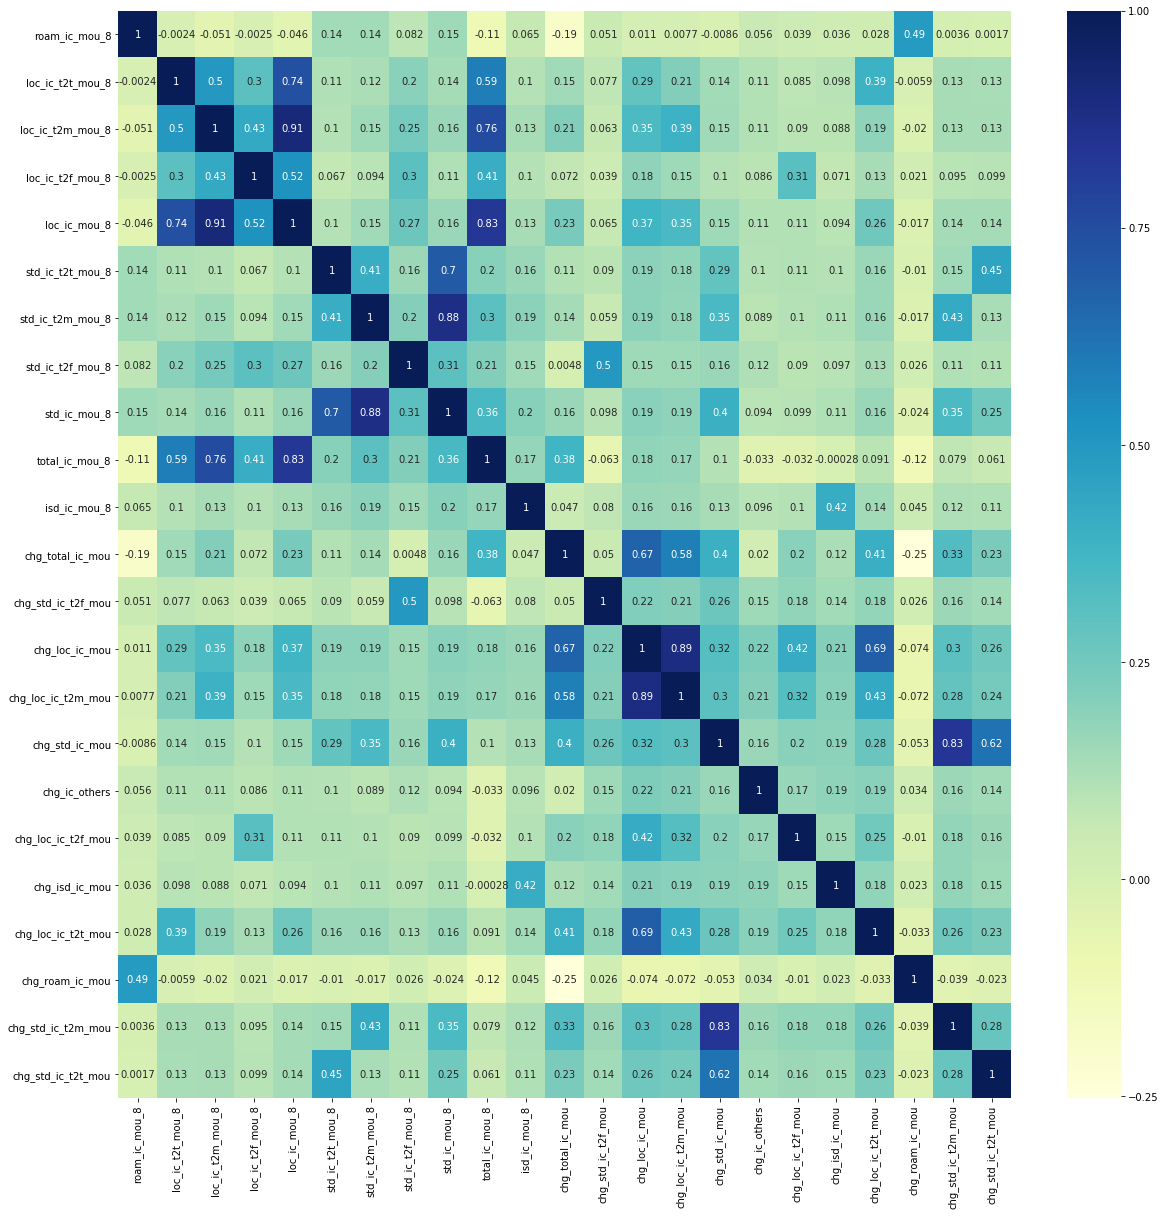

In [196]:
# lets analyze incoming call columns

cols_to_analyze=list(X_train.columns[X_train.columns.str.find('_ic_') != -1])

# Plot heatmap
plt.figure(figsize=(20,20))
ax = sns.heatmap(X_train[cols_to_analyze].corr(), annot=True, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [197]:
# loc_ic_mou_8 is highly correlated with many features
# std_ic_mou_8 is highly correlated with many features
# total_ic_mou_8 is highly correlated with many features
# similarly all corresponding chg_ columns of above 3 are highly correlated with other features.
# we can drop above columns

col_to_remove.extend(['loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'chg_loc_ic_mou', 'chg_std_ic_mou', 'chg_total_ic_mou'])

(24.0, 0.0)

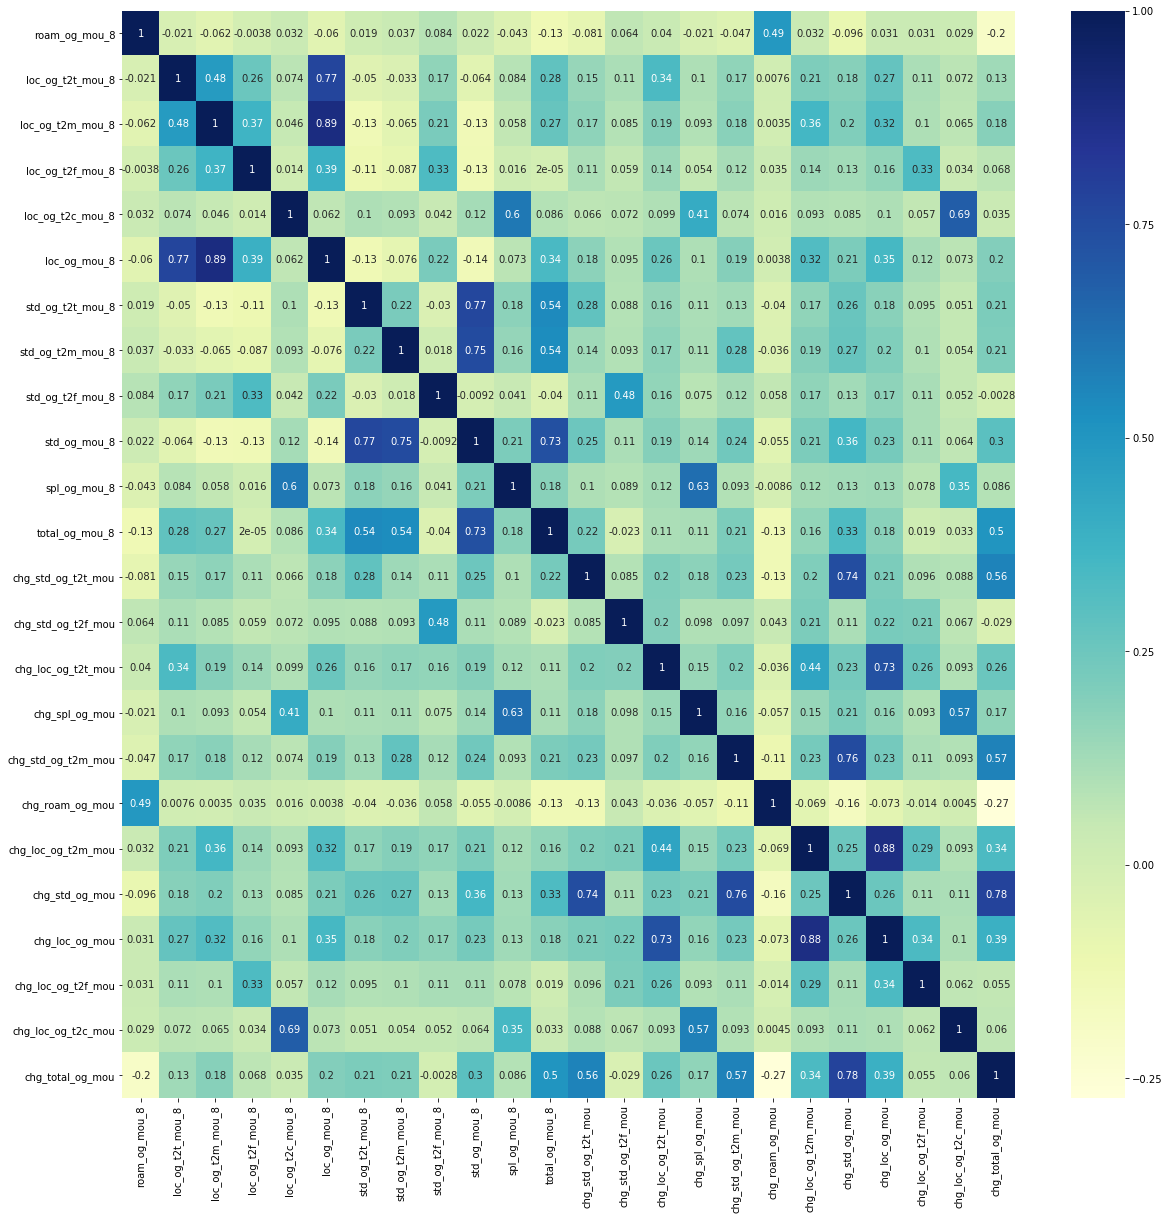

In [198]:
# lets analyze outgoing call columns

cols_to_analyze=list(X_train.columns[X_train.columns.str.find('_og_') != -1])

# Plot heatmap
plt.figure(figsize=(20,20))
ax = sns.heatmap(X_train[cols_to_analyze].corr(), annot=True, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [199]:
# loc_og_mou_8 is highly correlated with many features
# std_og_mou_8 is highly correlated with many features
# total_og_mou_8 is highly correlated with many features
# similarly all corresponding chg_ columns of above 3 are highly correlated with other features.
# we can drop above columns

col_to_remove.extend(['loc_og_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'chg_loc_og_mou', 'chg_std_og_mou', 'chg_total_og_mou'])

(8.0, 0.0)

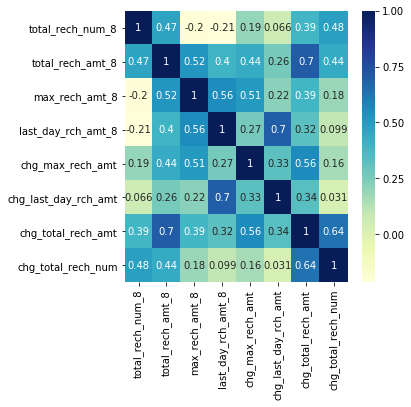

In [200]:
# lets analyze all rech columns

x_train_cols = X_train.columns

cols_to_analyze=list(x_train_cols[(x_train_cols.str.find('_rech_') != -1) | (x_train_cols.str.find('_rch_') != -1)])

# Plot heatmap
plt.figure(figsize=(5,5))
ax = sns.heatmap(X_train[cols_to_analyze].corr(), annot=True, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Does not look like too much correlation. So we should not remove any columns from above

In [201]:
# lets drop columns

X_train_manual = X_train.drop(col_to_remove, axis=1)
X_train_manual

onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  spl_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  vol_2g_mb_8  vol_3g_mb_8  sachet_2g_8  vbc_3g_8  chg_std_og_t2t_mou  chg_offnet_mou  chg_std_og_t2f_mou  chg_std_ic_t2f_mou  chg_loc_og_t2t_mou  chg_loc_ic_t2m_mou  chg_ic_others  chg_max_rech_amt  chg_spl_og_mou  chg_last_day_rch_amt  chg_std_og_t2m_mou  chg_loc_ic_t2f_mou  chg_roam_og_mou  chg_vbc_3g  chg_loc_og_t2m_mou  chg_total_rech_amt  chg_sachet_2g  chg_total_rech_num  chg_loc_og_t2f_mou  chg_vol_2g_mb  chg_isd_ic_mou  chg_loc_ic_t2t_mou  chg_loc_og_t2c_mou  chg_onnet_mou  chg_roam_ic_mou  chg_std_ic_t2m_mou  chg_vol_3g_mb  chg_std_ic_t2t_mou  aon_mon_cat
0        -0.644107     -0.627239      -0.402672      -0.404286         -0.231630         -0.018335         -0.547945         -0.449680         -0.574730         -0.636557         -0.381918     -0.645626         -0.388905         -0.331648         -0.225278         -0.580064         -0.423591         -0.439393     -0.407924    -0.428189         -0.905392         -0.497392       -0.186744            0.589409    -0.403958    -0.447524     -0.42696 -0.431449            0.092260        0.085103           -0.002681           -0.006399            0.186734           -0.809746      -0.035985          0.232417       -0.062958              0.235447            0.099382            0.134967         0.062820   -0.028876            0.043234            0.231280      -0.088739            0.049724           -0.550783       0.089755       -0.027390            0.138528           -0.028976       0.140897         0.046690            0.212332      -0.000374            0.016623     0.291237
1        -0.518888     -0.100874       3.457304       3.457759         -0.793224         -0.968713         -0.586216         -0.449680         -0.574730         -0.636557         -0.381918     -0.645626         -0.870449         -1.031348         -0.628634         -0.580064         -0.681601         -0.439393     -0.407924    -0.428189         -0.500890          1.512064        1.848644            2.107315    -0.312819     0.660596     -0.42696  1.653146           -0.555079       -0.092417           -0.002681           -4.637326           -0.209106           -2.591175      -1.765740          2.097890       -0.300405              1.387160           -1.009773           -2.447316         1.728946    2.643504           -1.098872            1.537250      -2.969867           -1.344447           -1.148872      -1.741393       -4.174720           -0.198225           -0.028976      -0.173970         1.799913           -1.069450       1.104439           -0.270812    -0.680745
2        -0.628136      0.605916       3.457304       2.543976         -0.601756         -0.207444          0.215166         -0.449680         -0.472546          0.796103         -0.381918     -0.645626         -0.510580         -0.004832          0.120226         -0.417584          2.987024         -0.439393     -0.407924    -0.428189         -0.770558          0.565079        2.833808           -1.028032     0.196342     1.846979     -0.42696 -0.431449            0.243017        1.830625           -0.002681           -0.006399            0.307668            1.606259      -0.035985         -0.186724       -0.062958             -3.093129            2.132769            1.108201        -0.775679   -0.028876            1.212922            0.325761      -0.088739            0.142669            1.157450       0.307027       -0.027390            0.523967           -0.028976       0.234342        -0.738264            4.862578       0.620366            0.217313     1.263219
3         1.936606      2.326813      -0.402672      -0.404286          2.859270   

In [202]:
X_test_manual = X_test.drop(col_to_remove, axis=1)

In [203]:
# Logistic Regression

logreg_rfe = LogisticRegression(class_weight='balanced')


rfe = RFE(logreg_rfe, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train_manual, y_train.ravel())

list(zip(X_train_manual.columns, rfe.support_, rfe.ranking_))

C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[('onnet_mou_8', False, 30),
 ('offnet_mou_8', False, 19),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_8', False, 11),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_8', False, 32),
 ('loc_og_t2c_mou_8', False, 15),
 ('std_og_t2t_mou_8', False, 39),
 ('std_og_t2m_mou_8', False, 20),
 ('std_og_t2f_mou_8', False, 16),
 ('spl_og_mou_8', False, 29),
 ('loc_ic_t2t_mou_8', False, 40),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', False, 7),
 ('std_ic_t2t_mou_8', False, 26),
 ('std_ic_t2m_mou_8', False, 17),
 ('std_ic_t2f_mou_8', False, 41),
 ('isd_ic_mou_8', True, 1),
 ('ic_others_8', False, 25),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', True, 1),
 ('max_rech_amt_8', False, 43),
 ('last_day_rch_amt_8', True, 1),
 ('vol_2g_mb_8', True, 1),
 ('vol_3g_mb_8', True, 1),
 ('sachet_2g_8', False, 2),
 ('vbc_3g_8', False, 38),
 ('chg_std_og_t2t_mou', False, 13),
 ('chg_offnet_mou', False, 5),
 ('chg_std_og_t2f_mou', False, 21),
 ('chg_std_ic_t2f_

In [204]:
# Lets find RFE cols

cols = list(X_train_manual.columns[rfe.support_])
cols

['roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2m_mou_8',
 'loc_ic_t2m_mou_8',
 'isd_ic_mou_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'last_day_rch_amt_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'chg_last_day_rch_amt',
 'chg_loc_og_t2m_mou',
 'chg_total_rech_amt',
 'chg_total_rech_num',
 'aon_mon_cat']

In [205]:
# Lets find required columns

X_train_rfe = X_train_manual[cols]
X_test_rfe = X_test_manual[cols]

In [206]:
# Fit a model

logreg_rfe.fit(X_train_rfe, y_train.ravel())

C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [207]:
# Lets find classification report

y_train_pred_logreg_rfe = logreg_rfe.predict(X_train_rfe)

print('Logistic Regression with RFE:')
classification_train_logreg_rfe = metrics.classification_report(y_train, y_train_pred_logreg_rfe)
print('Classification report for Train:')
print(classification_train_logreg_rfe)

Logistic Regression with RFE:
Classification report for Train:
              precision    recall  f1-score   support

       False       0.98      0.83      0.90     19126
        True       0.31      0.82      0.45      1783

    accuracy                           0.83     20909
   macro avg       0.64      0.83      0.67     20909
weighted avg       0.92      0.83      0.86     20909



In [208]:
# Lets find classification report for test

y_test_pred_logreg_rfe = logreg_rfe.predict(X_test_rfe)

print('Logistic Regression with RFE:')
classification_test_logreg_rfe = metrics.classification_report(y_test, y_test_pred_logreg_rfe)
print('Classification report for Test:')
print(classification_test_logreg_rfe)

Logistic Regression with RFE:
Classification report for Test:
              precision    recall  f1-score   support

       False       0.98      0.82      0.90      8203
        True       0.30      0.82      0.44       759

    accuracy                           0.82      8962
   macro avg       0.64      0.82      0.67      8962
weighted avg       0.92      0.82      0.86      8962



In [209]:
# Reusable function to calculate VIF

def calculate_vif(train_df):
    vif = pd.DataFrame()
    X = train_df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)

    return vif

In [210]:
# Lets check VIF

calculate_vif(X_train_rfe)

Features   VIF
1          roam_og_mou_8  4.21
0          roam_ic_mou_8  4.16
7     last_day_rch_amt_8  3.92
6       total_rech_amt_8  3.79
12    chg_total_rech_amt  3.41
10  chg_last_day_rch_amt  2.90
5       total_rech_num_8  2.68
2       loc_og_t2m_mou_8  2.33
13    chg_total_rech_num  2.27
3       loc_ic_t2m_mou_8  1.94
11    chg_loc_og_t2m_mou  1.28
9            vol_3g_mb_8  1.14
14           aon_mon_cat  1.11
4           isd_ic_mou_8  1.05
8            vol_2g_mb_8  1.04

### Looks like all features are within the limits of VIF of 5. So no need to drop any features

In [212]:
# Fit a final model (would be same as above, but we will get results in one output for analysis)

logreg_rfe.fit(X_train_rfe, y_train)

# Lets find classification report

y_train_pred_logreg_rfe = logreg_rfe.predict(X_train_rfe)

print('Logistic Regression with RFE:')
classification_train_logreg_rfe = metrics.classification_report(y_train, y_train_pred_logreg_rfe)
print('Classification report for Train:')
print(classification_train_logreg_rfe)

# Lets find classification report for test

X_test_rfe = X_test[cols]

y_test_pred_logreg_rfe = logreg_rfe.predict(X_test_rfe)

print('Logistic Regression with RFE:')
classification_test_logreg_rfe = metrics.classification_report(y_test, y_test_pred_logreg_rfe)
print('Classification report for Test:')
print(classification_test_logreg_rfe)

C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression with RFE:
Classification report for Train:
              precision    recall  f1-score   support

       False       0.98      0.83      0.90     19126
        True       0.31      0.82      0.45      1783

    accuracy                           0.83     20909
   macro avg       0.64      0.83      0.67     20909
weighted avg       0.92      0.83      0.86     20909

Logistic Regression with RFE:
Classification report for Test:
              precision    recall  f1-score   support

       False       0.98      0.82      0.90      8203
        True       0.30      0.82      0.44       759

    accuracy                           0.82      8962
   macro avg       0.64      0.82      0.67      8962
weighted avg       0.92      0.82      0.86      8962



### Above model is performing as good as the model built with PCA

In [213]:
# finding feature importance

result = pd.DataFrame((zip(np.array(cols), logreg_rfe.coef_[0])), columns=['Feature', 'Importance'])

# sorting based on absolute values of coefficients
result = result.reindex(result.Importance.abs().sort_values(ascending=False).index)
result


Feature  Importance
7     last_day_rch_amt_8   -0.970943
12    chg_total_rech_amt   -0.691578
5       total_rech_num_8   -0.488076
1          roam_og_mou_8    0.457961
9            vol_3g_mb_8   -0.435226
3       loc_ic_t2m_mou_8   -0.324155
10  chg_last_day_rch_amt    0.306698
8            vol_2g_mb_8   -0.284764
2       loc_og_t2m_mou_8   -0.271719
14           aon_mon_cat   -0.259205
4           isd_ic_mou_8    0.252856
6       total_rech_amt_8    0.247516
0          roam_ic_mou_8    0.218416
11    chg_loc_og_t2m_mou    0.209217
13    chg_total_rech_num   -0.182300

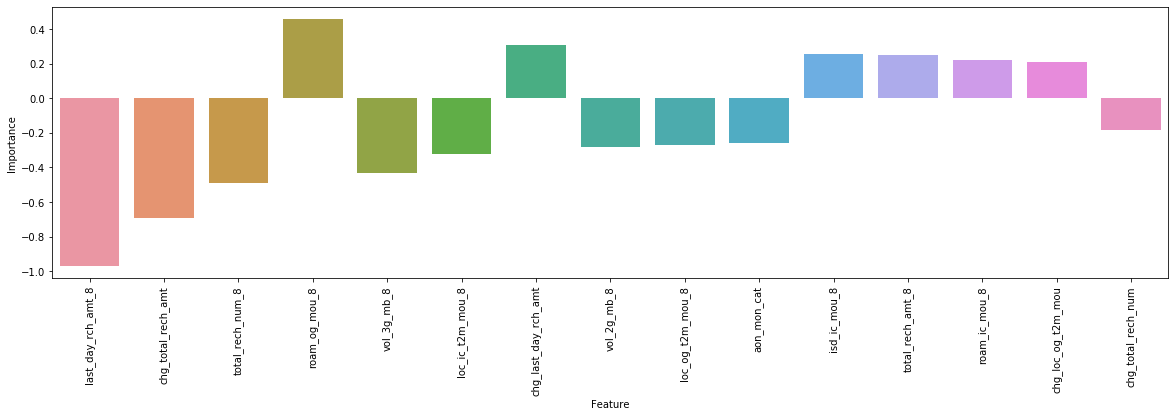

In [215]:
plt.figure(figsize=(20,5))
plt.xticks(rotation = 90)
sns.barplot(data=result, x='Feature', y='Importance')

### Analysis based on above model
- Last day recharge amount, Change in Total Recharge Amount, Total Recharge numbers is strong indicator of churn. If the amount is reducing then it will indicate possible churn in future
- If customer makes roaming outgoing or incoming calls then customer might churn. This indicates that customers are not happy with roaming services or call cost in roaming is huge
- If usage of 3G/2G data is reducing then the user might churn. This again indicates that the customers are not happy with internet services or the cost is high.
- Reduction in local incoming and outgoing calls indicate possible churn in future
- Age on network is less, then the chance of churning is more.
- Customers who use ISD incoming highly also have high chances of churning. This again indicates that the quality is not good or rates are high


# Random Forest (without PCA)

In [219]:
# we will use same model that was tuned above and check how it performs. If the results are not good, we will tune again

rfc_manual = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1000,
                       min_samples_split=2000, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [221]:
# we will use X_train data here since we know that Random Forest can take care of multicollinearity and high number of features

rfc_manual.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1000,
                       min_samples_split=2000, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [222]:
# Lets find classification report

y_train_pred_rf_rfe = rfc_manual.predict(X_train)

print('Random Forest Regression with RFE:')
classification_train_rf_rfe = metrics.classification_report(y_train, y_train_pred_rf_rfe)
print('Classification report for Train:')
print(classification_train_rf_rfe)

Random Forest Regression with RFE:
Classification report for Train:
              precision    recall  f1-score   support

       False       0.98      0.85      0.91     19126
        True       0.34      0.83      0.49      1783

    accuracy                           0.85     20909
   macro avg       0.66      0.84      0.70     20909
weighted avg       0.93      0.85      0.88     20909



In [223]:
# Lets find classification report for test

y_test_pred_rf_rfe = rfc_manual.predict(X_test)

print('Random Forest with RFE:')
classification_test_rf_rfe = metrics.classification_report(y_test, y_test_pred_rf_rfe)
print('Classification report for Test:')
print(classification_test_rf_rfe)

Random Forest with RFE:
Classification report for Test:
              precision    recall  f1-score   support

       False       0.98      0.86      0.91      8203
        True       0.35      0.84      0.49       759

    accuracy                           0.85      8962
   macro avg       0.67      0.85      0.70      8962
weighted avg       0.93      0.85      0.88      8962



In [224]:
# Feature importances

rfc_manual.feature_importances_

array([6.38916802e-02, 3.32139561e-04, 2.15702556e-04, 8.38950674e-02,
       8.68390629e-02, 3.72884490e-03, 6.02100813e-03, 6.19698821e-04,
       5.28456458e-05, 9.61414969e-03, 3.89904257e-04, 7.31650771e-04,
       2.13131941e-03, 3.96656916e-04, 2.31983769e-04, 8.31685177e-02,
       7.21940932e-03, 2.05115188e-02, 3.52258762e-03, 3.30927686e-02,
       9.02675768e-05, 3.21798744e-04, 0.00000000e+00, 1.85472320e-04,
       1.09281721e-01, 0.00000000e+00, 1.63409129e-04, 2.60655747e-03,
       7.17059777e-02, 2.13134284e-02, 5.25628378e-02, 4.21272027e-04,
       4.06546329e-04, 1.17316037e-05, 0.00000000e+00, 1.34876001e-03,
       5.13764999e-03, 8.46112574e-03, 2.25169602e-05, 1.23531211e-05,
       3.38118972e-03, 2.98160332e-04, 1.80197344e-03, 6.70052142e-04,
       7.35167338e-02, 4.38077264e-05, 1.59005002e-02, 6.34937287e-05,
       1.17435608e-02, 1.13198297e-03, 9.51668483e-05, 4.72375115e-02,
       0.00000000e+00, 1.21873838e-03, 7.06850626e-02, 6.63902771e-05,
      

In [225]:
# finding feature importance

result_rf = pd.DataFrame((zip(np.array(X_train.columns), rfc_manual.feature_importances_)), columns=['Feature', 'Importance'])

# sorting based on absolute values of coefficients
result_rf = result_rf.sort_values(by='Importance', ascending=False)


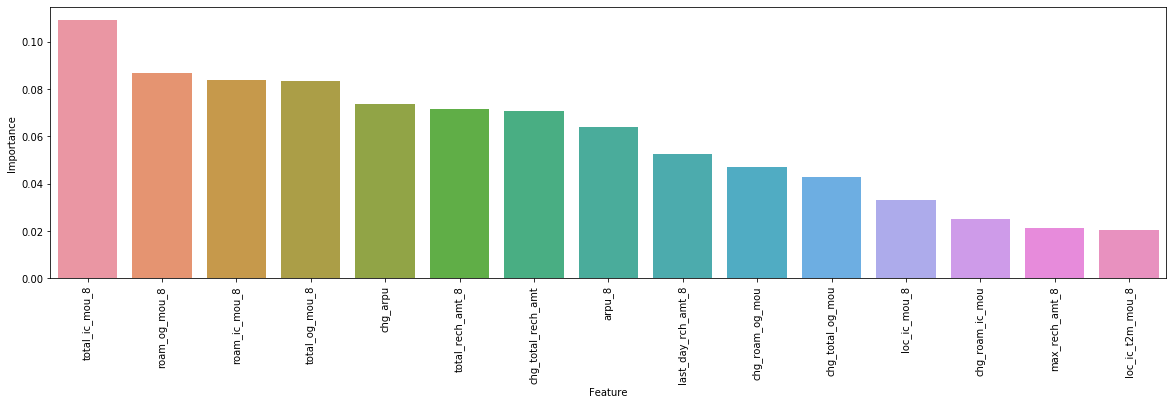

In [226]:
plt.figure(figsize=(20,5))

plt.xticks(rotation = 90)
sns.barplot(data=result_rf.iloc[:15,:], x='Feature', y='Importance')

### Analysis based on above model
- Incoming and outgoing calls reduces when customer is planning to switch
- Customer using roaming outgoing/incoming may churn
- Recharge Amounts/Numbers is strong indicator of churn. If the amount is reducing then it will indicate possible churn
- Revenue drops for the customer who is planning to switch


### Strategy
- Roaming Calls
    - Check the roaming call quality is good
    - Provide roaming packs
- 2G/3G users
    - Check the quality of service
    - Provide data packs.
    - Include some free data in existing packs 
- Number of calls/recharges
    - These are indicators of churn
    - Call such customers to get their feedback and check if they have any issues with the service
- Age on network
    - Provide more attention to new customers
    - Give them opportunity to provide feedback
- Feedback
    - Get frequent feedbacks from the customers on roaming, data, recharge amount etc.
    - Feedback will help improve the service


In [231]:
X_train_manual_chg = list(X_train_manual.columns[X_train_manual.columns.str.find('chg_') != -1])
X_train_manual[X_train_manual_chg]

chg_std_og_t2t_mou  chg_offnet_mou  chg_std_og_t2f_mou  chg_std_ic_t2f_mou  chg_loc_og_t2t_mou  chg_loc_ic_t2m_mou  chg_ic_others  chg_max_rech_amt  chg_spl_og_mou  chg_last_day_rch_amt  chg_std_og_t2m_mou  chg_loc_ic_t2f_mou  chg_roam_og_mou  chg_vbc_3g  chg_loc_og_t2m_mou  chg_total_rech_amt  chg_sachet_2g  chg_total_rech_num  chg_loc_og_t2f_mou  chg_vol_2g_mb  chg_isd_ic_mou  chg_loc_ic_t2t_mou  chg_loc_og_t2c_mou  chg_onnet_mou  chg_roam_ic_mou  chg_std_ic_t2m_mou  chg_vol_3g_mb  chg_std_ic_t2t_mou
0                0.092260        0.085103           -0.002681           -0.006399            0.186734           -0.809746      -0.035985          0.232417       -0.062958              0.235447            0.099382            0.134967         0.062820   -0.028876            0.043234            0.231280      -0.088739            0.049724           -0.550783       0.089755       -0.027390            0.138528           -0.028976       0.140897         0.046690            0.212332      -0.000374            0.016623
1               -0.555079       -0.092417           -0.002681           -4.637326           -0.209106           -2.591175      -1.765740          2.097890       -0.300405              1.387160           -1.009773           -2.447316         1.728946    2.643504           -1.098872            1.537250      -2.969867           -1.344447           -1.148872      -1.741393       -4.174720           -0.198225           -0.028976      -0.173970         1.799913           -1.069450       1.104439           -0.270812
2                0.243017        1.830625           -0.002681           -0.006399            0.307668            1.606259      -0.035985         -0.186724       -0.062958             -3.093129            2.132769            1.108201        -0.775679   -0.028876            1.212922            0.325761      -0.088739            0.142669            1.157450       0.307027       -0.027390            0.523967           -0.028976       0.234342        -0.738264            4.862578       0.620366            0.217313
3               -1.456866        1.614660           -2.382738           -0.006399            1.747758            1.921315      -0.035985         -0.186724       -0.145078              0.108886            1.060240           -0.013640        -4.116506   -0.028876            3.053340           -0.343987       2.216163            0.142669           -0.966881       0.098301        0.966379           -0.219612            2.248827      -1.091208        -4.125512           -2.505244      -0.000374           -0.323190
4                0.044491        0.034859           -0.002681           -0.006399           -0.074583            1.134986      -0.035985          0.220610       -0.062958              0.159510            0.057105            0.012770         0.062820   -0.028876           -0.035675            0.295283      -0.088739            0.328558            0.014216       0.089755       -0.027390           -0.102358           -0.028976       0.030786         0.046690           -0.378772      -0.000374            0.016623
...                   ...             ...                 ...                 ...                 ...                 ...            ...               ...             ...                   ...                 ...                 ...              ...         ...                 ...                 ...            ...                 ...                 ...            ...             ...                 ...                 ...            ...              ...                 ...            ...                 ...
20904           -2.740395       -0.493046           -0.002681           -0.006399           -0.142609           -0.160274      -0.035985          0.338678       -0.062958             -0.599861           -0.643442           -1.142970         0.062820   -0.028876           -0.112552           -0.750102      -0.088739           -0.600889           -0.072644       0.089755       -0.118486           -0.2

In [233]:
# Fit a final model (would be same as above, but we will get results in one output for analysis)

logreg_rfe.fit(X_train_manual[X_train_manual_chg], y_train)

# Lets find classification report

y_train_pred_logreg_rfe = logreg_rfe.predict(X_train_manual[X_train_manual_chg])

print('Logistic Regression with RFE:')
classification_train_logreg_rfe = metrics.classification_report(y_train, y_train_pred_logreg_rfe)
print('Classification report for Train:')
print(classification_train_logreg_rfe)

# Lets find classification report for test

X_test_rfe = X_test[cols]

y_test_pred_logreg_rfe = logreg_rfe.predict(X_test_manual[X_train_manual_chg])

print('Logistic Regression with RFE:')
classification_test_logreg_rfe = metrics.classification_report(y_test, y_test_pred_logreg_rfe)
print('Classification report for Test:')
print(classification_test_logreg_rfe)

C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression with RFE:
Classification report for Train:
              precision    recall  f1-score   support

       False       0.97      0.82      0.89     19126
        True       0.27      0.74      0.40      1783

    accuracy                           0.81     20909
   macro avg       0.62      0.78      0.64     20909
weighted avg       0.91      0.81      0.85     20909

Logistic Regression with RFE:
Classification report for Test:
              precision    recall  f1-score   support

       False       0.97      0.81      0.89      8203
        True       0.27      0.73      0.39       759

    accuracy                           0.81      8962
   macro avg       0.62      0.77      0.64      8962
weighted avg       0.91      0.81      0.84      8962



In [234]:
# finding feature importance

result1 = pd.DataFrame((zip(np.array(X_train_manual_chg), logreg_rfe.coef_[0])), columns=['Feature', 'Importance'])

# sorting based on absolute values of coefficients
result1 = result1.reindex(result.Importance.abs().sort_values(ascending=False).index)
result1



Feature  Importance
7       chg_max_rech_amt   -0.017010
12       chg_roam_og_mou    0.151689
5     chg_loc_ic_t2m_mou   -0.150332
1         chg_offnet_mou   -0.081918
9   chg_last_day_rch_amt   -0.327905
3     chg_std_ic_t2f_mou    0.065352
10    chg_std_og_t2m_mou   -0.049721
8         chg_spl_og_mou   -0.031566
2     chg_std_og_t2f_mou    0.102452
14    chg_loc_og_t2m_mou    0.215800
4     chg_loc_og_t2t_mou    0.160509
6          chg_ic_others    0.116889
0     chg_std_og_t2t_mou   -0.033199
11    chg_loc_ic_t2f_mou    0.109898
13            chg_vbc_3g   -0.081391

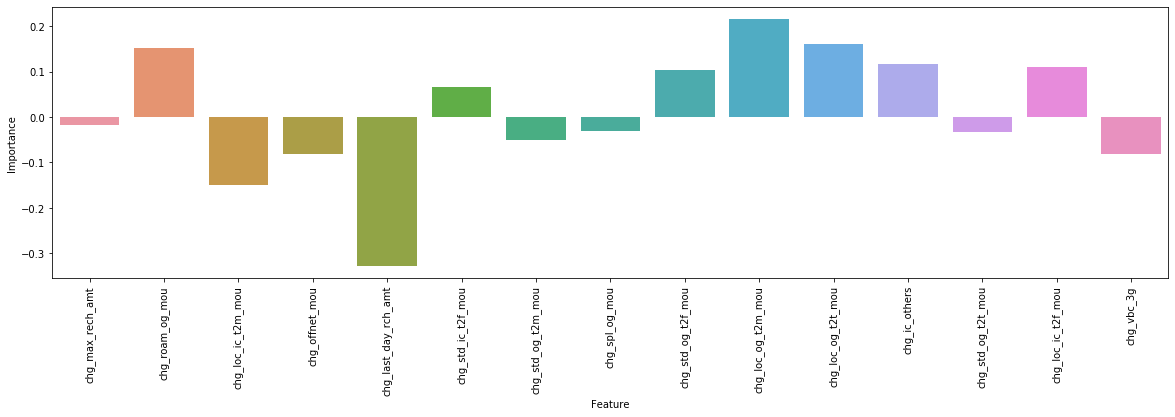

In [235]:
plt.figure(figsize=(20,5))
plt.xticks(rotation = 90)
sns.barplot(data=result1, x='Feature', y='Importance')